# Đề Tài: PHÂN TÍCH VẤN ĐỀ TAI NẠN GIAO THÔNG


# Khám phá dữ liệu và làm sạch dữ liệu


# 1. Giới thiệu

Hãy tưởng tượng bạn đang làm việc trong một dự án phân tích dữ liệu về tai nạn giao thông. Mỗi vụ tai nạn là một câu chuyện riêng, với những yếu tố như thời gian, địa điểm, điều kiện thời tiết, và các phương tiện liên quan. Dữ liệu mà chúng ta có trong tay là một kho tàng thông tin quý giá, giúp chúng ta hiểu rõ hơn về nguyên nhân và hậu quả của các vụ tai nạn.

Tuy nhiên, dữ liệu thô thường không hoàn hảo. Nó có thể chứa các giá trị bị thiếu, lỗi định dạng, hoặc thậm chí là những giá trị không hợp lệ. Nhiệm vụ của chúng ta là làm sạch và chuẩn bị dữ liệu này để có thể phân tích một cách chính xác và hiệu quả. Qua đó, chúng ta có thể đưa ra những kết luận hữu ích, góp phần cải thiện an toàn giao thông.

Trong notebook này, chúng ta sẽ khám phá và làm sạch dữ liệu từ hai tệp: `Accident_Information.csv` và `Vehicle_Information.csv`. Hãy cùng bắt đầu hành trình này!


Link dữ liệu : https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles/data


Dưới đây là giới thiệu các thuộc tính (cột) có trong hai tập dữ liệu gốc trước khi làm sạch:

1. Accident_Information.csv

Accident_Index: Mã định danh duy nhất cho mỗi vụ tai nạn.

Date: Ngày xảy ra tai nạn.

Time: Thời gian xảy ra tai nạn.

Day_of_Week: Thứ trong tuần xảy ra tai nạn.

Accident_Severity: Mức độ nghiêm trọng của tai nạn (ví dụ: nhẹ, nặng, tử vong).

Number_of_Casualties: Số người bị thương hoặc tử vong trong vụ tai nạn.

Number_of_Vehicles: Số phương tiện liên quan đến vụ tai nạn.

Weather_Conditions: Điều kiện thời tiết khi xảy ra tai nạn.

Road_Surface_Conditions: Tình trạng mặt đường.

Light_Conditions: Điều kiện ánh sáng tại thời điểm xảy ra tai nạn.

Speed_limit: Giới hạn tốc độ tại nơi xảy ra tai nạn.

Urban_or_Rural_Area: Khu vực xảy ra tai nạn (đô thị hoặc nông thôn).

Latitude: Vĩ độ nơi xảy ra tai nạn.

Longitude: Kinh độ nơi xảy ra tai nạn.

Junction_Detail: Chi tiết về giao lộ (nếu có).

Junction_Control: Loại kiểm soát giao lộ (đèn tín hiệu, biển báo, v.v.).

Year: Năm xảy ra tai nạn.

Special_Conditions_at_Site: Các điều kiện đặc biệt tại hiện trường (nếu có).

2. Vehicle_Information.csv

Accident_Index: Mã định danh vụ tai nạn (dùng để liên kết với bảng Accident_Information).

Vehicle_Reference: Mã định danh phương tiện trong vụ tai nạn.

Vehicle_Type: Loại phương tiện (ô tô, xe máy, xe tải, v.v.).

Engine*Capacity*.CC.: Dung tích động cơ (cm³).

Age_Band_of_Driver: Nhóm tuổi của tài xế.

Sex_of_Driver: Giới tính của tài xế.

Vehicle_Manoeuvre: Tình huống di chuyển của phương tiện khi xảy ra tai nạn.

Skidding_and_Overturning: Thông tin về việc trượt bánh hoặc lật xe.

Vehicle_Leaving_Carriageway: Phương tiện có rời khỏi làn đường hay không.

Journey_Purpose_of_Driver: Mục đích chuyến đi của tài xế.

Driver_Home_Area_Type: Loại khu vực nơi ở của tài xế (đô thị/nông thôn).

Các thuộc tính này cung cấp thông tin chi tiết về từng vụ tai nạn và phương tiện liên quan, giúp phân tích nguyên nhân, điều kiện và hậu quả của các vụ tai nạn giao thông.


# 2.Tiền xử lí dữ liệu và khám phá dữ liệu


## Thư viện


Sử dụng các thư viện `pandas` và `numpy` để xử lý và phân tích dữ liệu.


In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px


## Đọc dữ liệu


Đọc hai tệp dữ liệu Accident_Information.csv và Vehicle_Information.csv vào các DataFrame accident_df và vehicle_df.

Tệp Vehicle_Information.csv sử dụng mã hóa ISO-8859-1.


In [4]:
accident_df = pd.read_csv('Accident_Information.csv')
vehicle_df = pd.read_csv('Vehicle_Information.csv', encoding='ISO-8859-1')

C:\Users\ACER\AppData\Local\Temp\ipykernel_5456\1416602696.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_df = pd.read_csv('Accident_Information.csv')


## Kiểm tra dữ liệu


Kiểm tra kích thước và hiển thị một số dòng đầu tiên của accident_df.

In ra danh sách các cột trong accident_df.

Kiểm tra kích thước và hiển thị một số dòng đầu tiên của vehicle_df.


In [5]:
print(accident_df.shape)
accident_df.head()

(2047256, 34)


Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  2005-01-04   
1              0.0            Slight                 NaN  2005-01-05   
2              0.0            Slight                 NaN  2005-01-06   
3              0.0            Slight                 NaN  2005-01-07   
4              0.0            Slight                 NaN  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                                          1.0  ...   
2    Thursday                                          1.0  ...   
3      Friday                                          1.0  ...   
4      Monday                                          1.0  ...   

          Police_Force Road_Surface_Conditions           Road_Type  \
0  Metropolitan Police             Wet or damp  Single carriageway   
1  Metropolitan Police                     Dry    Dual carriageway   
2  Metropolitan Police                     Dry  Single carriageway   
3  Metropolitan Police                     Dry  Single carriageway   
4  Metropolitan Police             Wet or damp  Single carriageway   

  Special_Conditions_at_Site Speed_limit   Time  Urban_or_Rural_Area  \
0                        NaN        30.0  17:42                Urban   
1                        NaN        30.0  17:36                Urban   
2                        NaN        30.0  00:15                Urban   
3                        NaN        30.0  10:35                Urban   
4                        NaN        30.0  21:13                Urban   

      Weather_Conditions  Year InScotland  
0  Raining no high winds  2005         No  
1     Fine no high winds  2005         No  
2     Fine no high winds  2005         No  
3     Fine no high winds  2005         No  
4     Fine no high winds  2005         No  

[5 rows x 34 columns]

In [6]:
print(accident_df.columns)

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')


In [7]:
print(vehicle_df.shape)
vehicle_df.head()

(2177205, 24)


Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
0  200401BS00001            26 - 35             3.0   
1  200401BS00002            26 - 35             NaN   
2  200401BS00003            26 - 35             4.0   
3  200401BS00003            66 - 75             NaN   
4  200401BS00004            26 - 35             1.0   

          Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC.  \
0                    Urban area                4.0                1588.0   
1                    Urban area                3.0                   NaN   
2  Data missing or out of range                NaN                 998.0   
3  Data missing or out of range                NaN                   NaN   
4                    Urban area                4.0                 124.0   

  Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

      Journey_Purpose_of_Driver             Junction_Location  ...  \
0  Data missing or out of range  Data missing or out of range  ...   
1  Data missing or out of range  Data missing or out of range  ...   
2  Data missing or out of range  Data missing or out of range  ...   
3  Data missing or out of range  Data missing or out of range  ...   
4  Data missing or out of range  Data missing or out of range  ...   

  Skidding_and_Overturning Towing_and_Articulation  \
0                      NaN     No tow/articulation   
1                      NaN     No tow/articulation   
2                      NaN     No tow/articulation   
3                      NaN     No tow/articulation   
4                      NaN     No tow/articulation   

  Vehicle_Leaving_Carriageway Vehicle_Location.Restricted_Lane  \
0   Did not leave carriageway                              0.0   
1   Did not leave carriageway                              0.0   
2   Did not leave carriageway                              0.0   
3   Did not leave carriageway                              0.0   
4   Did not leave carriageway                              0.0   

   Vehicle_Manoeuvre Vehicle_Reference                Vehicle_Type  \
0  Going ahead other                 2                         109   
1  Going ahead other                 1                         109   
2      Turning right                 1                         109   
3  Going ahead other                 2                         109   
4  Going ahead other                 1  Motorcycle 125cc and under   

    Was_Vehicle_Left_Hand_Drive X1st_Point_of_Impact  Year  
0  Data missing or out of range                Front  2004  
1  Data missing or out of range                Front  2004  
2  Data missing or out of range                Front  2004  
3  Data missing or out of range                Front  2004  
4  Data missing or out of range                Front  2004  

[5 rows x 24 columns]

## Lựa chọn các cột cần thiết


Chọn các cột quan trọng từ hai DataFrame để phục vụ phân tích.


In [8]:
accidents_selected = accident_df[[
    'Accident_Index', 'Date', 'Time', 'Day_of_Week',
    'Accident_Severity', 'Number_of_Casualties', 'Number_of_Vehicles',
    'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions',
    'Speed_limit', 'Urban_or_Rural_Area',
    'Latitude', 'Longitude',
    'Junction_Detail', 'Junction_Control', 'Year', 'Special_Conditions_at_Site'
]]


vehicles_selected = vehicle_df[[
    'Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
    'Engine_Capacity_.CC.', 'Age_Band_of_Driver', 'Sex_of_Driver',
    'Vehicle_Manoeuvre', 'Skidding_and_Overturning',
    'Vehicle_Leaving_Carriageway', 'Journey_Purpose_of_Driver',
    'Driver_Home_Area_Type'
]]

## Kết hợp dữ liệu


Kết hợp hai DataFrame accidents_selected và vehicles_selected dựa trên cột chung Accident_Index bằng phương pháp inner join.


In [9]:
data = pd.merge(accidents_selected, vehicles_selected, on='Accident_Index', how='inner')

## Thông tin dữ liệu


Hiển thị thông tin tổng quan về DataFrame data, bao gồm số lượng cột, kiểu dữ liệu và số lượng giá trị không null.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Accident_Index               object 
 1   Date                         object 
 2   Time                         object 
 3   Day_of_Week                  object 
 4   Accident_Severity            object 
 5   Number_of_Casualties         int64  
 6   Number_of_Vehicles           int64  
 7   Weather_Conditions           object 
 8   Road_Surface_Conditions      object 
 9   Light_Conditions             object 
 10  Speed_limit                  float64
 11  Urban_or_Rural_Area          object 
 12  Latitude                     float64
 13  Longitude                    float64
 14  Junction_Detail              object 
 15  Junction_Control             object 
 16  Year                         int64  
 17  Special_Conditions_at_Site   object 
 18  Vehicle_Reference            int64  
 19  

In [11]:
print(data.shape)

(2058408, 28)


## Thống kê mô tả


Tính toán các thống kê cơ bản như trung bình, độ lệch chuẩn, giá trị lớn nhất và nhỏ nhất cho các cột số.


In [12]:
print(data.describe())

       Number_of_Casualties  Number_of_Vehicles   Speed_limit      Latitude  \
count          2.058408e+06        2.058408e+06  2.058343e+06  2.058284e+06   
mean           1.449605e+00        2.124032e+00  3.975699e+01  5.254775e+01   
std            1.033484e+00        9.641580e-01  1.460916e+01  1.437453e+00   
min            1.000000e+00        1.000000e+00  0.000000e+00  4.991294e+01   
25%            1.000000e+00        2.000000e+00  3.000000e+01  5.148191e+01   
50%            1.000000e+00        2.000000e+00  3.000000e+01  5.221756e+01   
75%            2.000000e+00        2.000000e+00  5.000000e+01  5.345394e+01   
max            9.300000e+01        6.700000e+01  7.000000e+01  6.075754e+01   

          Longitude          Year  Vehicle_Reference  Engine_Capacity_.CC.  
count  2.058283e+06  2.058408e+06       2.058408e+06          1.808091e+06  
mean  -1.397291e+00  2.011334e+03       1.553280e+00          2.028291e+03  
std    1.393690e+00  3.391307e+00       7.767501e-01     

## Xử lý cột ngày và giờ


Hiển thị một số giá trị đầu tiên của cột Date.

Chuyển đổi cột Date sang kiểu dữ liệu datetime.

Chuyển đổi cột Time sang kiểu thời gian (time), xử lý lỗi định dạng bằng cách sử dụng errors='coerce'.


In [13]:
print(data['Date'].head(10))

0    2005-01-05
1    2005-01-06
2    2005-01-07
3    2005-01-10
4    2005-01-11
5    2005-01-11
6    2005-01-13
7    2005-01-13
8    2005-01-14
9    2005-01-16
Name: Date, dtype: object


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time

## Kiểm tra kiểu dữ liệu


In ra kiểu dữ liệu của từng cột trong DataFrame data.


In [15]:
print(data.dtypes)

Accident_Index                         object
Date                           datetime64[ns]
Time                                   object
Day_of_Week                            object
Accident_Severity                      object
Number_of_Casualties                    int64
Number_of_Vehicles                      int64
Weather_Conditions                     object
Road_Surface_Conditions                object
Light_Conditions                       object
Speed_limit                           float64
Urban_or_Rural_Area                    object
Latitude                              float64
Longitude                             float64
Junction_Detail                        object
Junction_Control                       object
Year                                    int64
Special_Conditions_at_Site             object
Vehicle_Reference                       int64
Vehicle_Type                           object
Engine_Capacity_.CC.                  float64
Age_Band_of_Driver                

## Kiểm tra giá trị thiếu


Kiểm tra số lượng giá trị thiếu trong từng cột.


In [16]:

print(data.isnull().sum())

Accident_Index                       0
Date                                 0
Time                               146
Day_of_Week                          0
Accident_Severity                    0
Number_of_Casualties                 0
Number_of_Vehicles                   0
Weather_Conditions                   0
Road_Surface_Conditions              0
Light_Conditions                     0
Speed_limit                         65
Urban_or_Rural_Area                  0
Latitude                           124
Longitude                          125
Junction_Detail                      0
Junction_Control                     0
Year                                 0
Special_Conditions_at_Site     2006278
Vehicle_Reference                    0
Vehicle_Type                         0
Engine_Capacity_.CC.            250317
Age_Band_of_Driver                   0
Sex_of_Driver                        0
Vehicle_Manoeuvre                    0
Skidding_and_Overturning       1798784
Vehicle_Leaving_Carriagew

## Xử lý giá trị thiếu


Loại bỏ các cột không cần thiết (Engine*Capacity*.CC. và Skidding_and_Overturning).

Loại bỏ các dòng có giá trị thiếu trong cột Latitude và Longitude.

Điền giá trị phổ biến nhất (mode) cho các cột Time và Speed_limit.

Điền giá trị mặc định 'No' cho cột Special_Conditions_at_Site.


In [17]:
# Loại bỏ cột Engine_Capacity_.CC. và Skidding_and_Overturning
data.drop(columns=['Engine_Capacity_.CC.', 'Skidding_and_Overturning'], inplace=True)
data = data.dropna(subset=['Latitude', 'Longitude'])

# Tính giá trị phổ biến nhất 
most_common_time = data['Time'].mode()[0]
data['Time'] = data['Time'].fillna(most_common_time)

most_common_speed = data['Speed_limit'].mode()[0]
data['Speed_limit'] = data['Speed_limit'].fillna(most_common_speed)


data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].fillna('No')

## Kiểm tra lại giá trị thiếu


Kiểm tra lại số lượng giá trị thiếu sau khi xử lý.


In [18]:
print(data.isnull().sum())

Accident_Index                 0
Date                           0
Time                           0
Day_of_Week                    0
Accident_Severity              0
Number_of_Casualties           0
Number_of_Vehicles             0
Weather_Conditions             0
Road_Surface_Conditions        0
Light_Conditions               0
Speed_limit                    0
Urban_or_Rural_Area            0
Latitude                       0
Longitude                      0
Junction_Detail                0
Junction_Control               0
Year                           0
Special_Conditions_at_Site     0
Vehicle_Reference              0
Vehicle_Type                   0
Age_Band_of_Driver             0
Sex_of_Driver                  0
Vehicle_Manoeuvre              0
Vehicle_Leaving_Carriageway    0
Journey_Purpose_of_Driver      0
Driver_Home_Area_Type          0
dtype: int64


## Phân tích dữ liệu một số cột


Tính toán các thống kê mô tả cho các cột Number_of_Casualties và Number_of_Vehicles.


In [19]:
print(data['Number_of_Casualties'].describe())
print(data['Number_of_Vehicles'].describe())

count    2.058283e+06
mean     1.449610e+00
std      1.033497e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.300000e+01
Name: Number_of_Casualties, dtype: float64
count    2.058283e+06
mean     2.124035e+00
std      9.641695e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      6.700000e+01
Name: Number_of_Vehicles, dtype: float64


## Phát hiện và xử lý ngoại lệ


Phát hiện các giá trị ngoại lệ trong các cột Number_of_Casualties, Number_of_Vehicles, và Speed_limit.
Loại bỏ các dòng có giá trị ngoại lệ.


In [20]:
# Ví dụ: nếu tai nạn có hơn 6 người bị thương
outliers_casualties = data[data['Number_of_Casualties'] > 6]
print("Outliers hợp lý trong 'Number_of_Casualties':", len(outliers_casualties))
print(outliers_casualties[['Number_of_Casualties']].head())

# Nếu tai nạn có hơn 5 xe liên quan
outliers_vehicles = data[data['Number_of_Vehicles'] > 6]
print("Outliers hợp lý trong 'Number_of_Vehicles':", len(outliers_vehicles))
print(outliers_vehicles[['Number_of_Vehicles']].head())

outliers_vehicles = data[data['Speed_limit'] > 100]
print("Outliers hợp lý trong 'Speed_limit':", len(outliers_vehicles))
print(outliers_vehicles[['Speed_limit']].head())

Outliers hợp lý trong 'Number_of_Casualties': 5940
      Number_of_Casualties
4253                     7
4602                     7
4603                     7
4604                     7
4605                     7
Outliers hợp lý trong 'Number_of_Vehicles': 7818
      Number_of_Vehicles
4602                   8
4603                   8
4604                   8
4605                   8
4606                   8
Outliers hợp lý trong 'Speed_limit': 0
Empty DataFrame
Columns: [Speed_limit]
Index: []


In [21]:
data = data[data['Number_of_Casualties'] <= 6]
data = data[data['Number_of_Vehicles'] <= 5]

## Xử lý giá trị "Data missing or out of range"


Kiểm tra số lượng giá trị "Data missing or out of range" trong từng cột.

Thay thế giá trị "Data missing or out of range" bằng giá trị phổ biến nhất (mode) hoặc 'Unknown' tùy thuộc vào cột.

Loại bỏ các cột không cần thiết (Journey_Purpose_of_Driver và Driver_Home_Area_Type).


In [22]:
for col in data.columns:
    print(f"{col}: {data[col].isin(['Data missing or out of range']).sum()} dòng")

Accident_Index: 0 dòng
Date: 0 dòng
Time: 0 dòng
Day_of_Week: 0 dòng
Accident_Severity: 0 dòng
Number_of_Casualties: 0 dòng
Number_of_Vehicles: 0 dòng
Weather_Conditions: 173 dòng
Road_Surface_Conditions: 3577 dòng
Light_Conditions: 23 dòng
Speed_limit: 0 dòng
Urban_or_Rural_Area: 0 dòng
Latitude: 0 dòng
Longitude: 0 dòng
Junction_Detail: 182 dòng
Junction_Control: 733579 dòng
Year: 0 dòng
Special_Conditions_at_Site: 1046 dòng
Vehicle_Reference: 0 dòng
Vehicle_Type: 399 dòng
Age_Band_of_Driver: 160492 dòng
Sex_of_Driver: 68 dòng
Vehicle_Manoeuvre: 1274 dòng
Vehicle_Leaving_Carriageway: 1182 dòng
Journey_Purpose_of_Driver: 14621 dòng
Driver_Home_Area_Type: 297216 dòng


In [23]:
for col in ['Weather_Conditions', 'Light_Conditions', 'Junction_Detail', 'Vehicle_Type', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Special_Conditions_at_Site']:
    data[col] = data[col].replace("Data missing or out of range", data[col].mode()[0])


for col in ['Junction_Control', 'Vehicle_Manoeuvre', 'Road_Surface_Conditions', 'Vehicle_Leaving_Carriageway']:
    data[col] = data[col].replace("Data missing or out of range", "Unknown")

data.drop(columns=['Journey_Purpose_of_Driver', 'Driver_Home_Area_Type'], inplace=True)

Kiểm tra lại


In [24]:
for col in data.columns:
    print(f"{col}: {data[col].isin(['Data missing or out of range']).sum()} dòng")

Accident_Index: 0 dòng
Date: 0 dòng
Time: 0 dòng
Day_of_Week: 0 dòng
Accident_Severity: 0 dòng
Number_of_Casualties: 0 dòng
Number_of_Vehicles: 0 dòng
Weather_Conditions: 0 dòng
Road_Surface_Conditions: 0 dòng
Light_Conditions: 0 dòng
Speed_limit: 0 dòng
Urban_or_Rural_Area: 0 dòng
Latitude: 0 dòng
Longitude: 0 dòng
Junction_Detail: 0 dòng
Junction_Control: 0 dòng
Year: 0 dòng
Special_Conditions_at_Site: 0 dòng
Vehicle_Reference: 0 dòng
Vehicle_Type: 0 dòng
Age_Band_of_Driver: 0 dòng
Sex_of_Driver: 0 dòng
Vehicle_Manoeuvre: 0 dòng
Vehicle_Leaving_Carriageway: 0 dòng


## Chuyển đổi kiểu dữ liệu


In [25]:
categorical_cols = [
    'Day_of_Week',              
    'Accident_Severity',    
    'Weather_Conditions',       
    'Road_Surface_Conditions',  
    'Light_Conditions',         
    'Urban_or_Rural_Area',      
    'Junction_Detail',          
    'Junction_Control',         
    'Special_Conditions_at_Site',
    'Vehicle_Type',             
    'Age_Band_of_Driver',        
    'Sex_of_Driver',             
    'Vehicle_Manoeuvre',         
    'Vehicle_Leaving_Carriageway', 
]

for col in categorical_cols:
    data[col] = data[col].astype('category')
print(data.dtypes)

Accident_Index                         object
Date                           datetime64[ns]
Time                                   object
Day_of_Week                          category
Accident_Severity                    category
Number_of_Casualties                    int64
Number_of_Vehicles                      int64
Weather_Conditions                   category
Road_Surface_Conditions              category
Light_Conditions                     category
Speed_limit                           float64
Urban_or_Rural_Area                  category
Latitude                              float64
Longitude                             float64
Junction_Detail                      category
Junction_Control                     category
Year                                    int64
Special_Conditions_at_Site           category
Vehicle_Reference                       int64
Vehicle_Type                         category
Age_Band_of_Driver                   category
Sex_of_Driver                     

## Kiểm tra giá trị trùng lặp


In [26]:
print(data.duplicated().sum())

0


## Kiểm tra giá trị không hợp lệ


In [27]:
# Kiểm tra giá trị không hợp lệ
invalid_lat = data[(data['Latitude'] < -90) | (data['Latitude'] > 90)]
invalid_lon = data[(data['Longitude'] < -180) | (data['Longitude'] > 180)]

# Hiển thị kết quả
print("Số dòng có Latitude không hợp lệ:", len(invalid_lat))
print("Số dòng có Longitude không hợp lệ:", len(invalid_lon))

Số dòng có Latitude không hợp lệ: 0
Số dòng có Longitude không hợp lệ: 0


## Tạo đặc trưng mới


Thời gian trong ngày


In [28]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

data['Time_Period'] = data['Time'].apply(lambda x: categorize_time(x.hour) if pd.notnull(x) else 'Unknown')

Ngày cuối tuần hay ngày thường


In [29]:
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

Mức độ nghiêm trọng theo số người bị thương


In [30]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Date'].dt.month.apply(get_season)

In [31]:
print(data['Is_Weekend'].values)

['Weekday' 'Weekday' 'Weekday' ... 'Weekday' 'Weekend' 'Weekend']


In [32]:
print(data.columns)

Index(['Accident_Index', 'Date', 'Time', 'Day_of_Week', 'Accident_Severity',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Light_Conditions', 'Speed_limit',
       'Urban_or_Rural_Area', 'Latitude', 'Longitude', 'Junction_Detail',
       'Junction_Control', 'Year', 'Special_Conditions_at_Site',
       'Vehicle_Reference', 'Vehicle_Type', 'Age_Band_of_Driver',
       'Sex_of_Driver', 'Vehicle_Manoeuvre', 'Vehicle_Leaving_Carriageway',
       'Time_Period', 'Is_Weekend', 'Season'],
      dtype='object')


In [33]:
print("Các giá trị duy nhất trong cột 'Accident_Severity':", data['Accident_Severity'].unique())

Các giá trị duy nhất trong cột 'Accident_Severity': ['Slight', 'Serious', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']


In [ ]:
data.drop(columns=['Accident_Index'], inplace=True)

## Lưu dữ liệu đã làm sạch


In [ ]:
data.to_csv('cleaned_data.csv', index=False)

# 3.Phân tích chuyên sâu về tập dữ liệu


## 3.1 Phân tích tai nạn theo thời gian

Dữ liệu: `cleaned_data.csv`
Phân tích tập trung vào thời điểm tai nạn xảy ra trong ngày, ngày trong tuần, mùa, năm và cuối tuần.


In [ ]:
# Đọc dữ liệu
df = pd.read_csv('cleaned_data.csv')
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

C:\Users\ACER\AppData\Local\Temp\ipykernel_5456\2509785487.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


### 1. Phân bố tai nạn theo giờ trong ngày


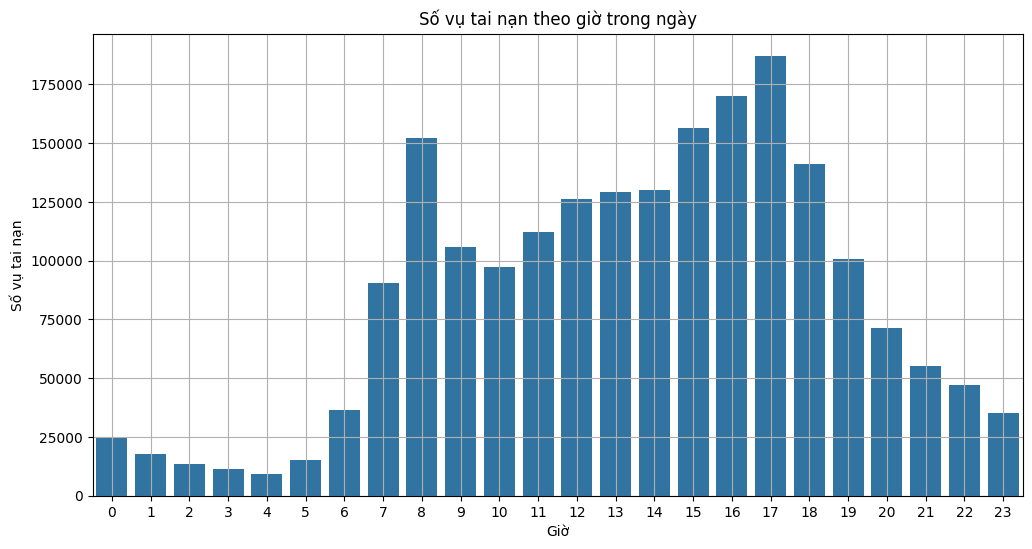

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour', order=sorted(df['Hour'].dropna().unique()))
plt.title('Số vụ tai nạn theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số vụ tai nạn')
plt.grid(True)
plt.show()

Giờ cao điểm xảy ra nhiều tai nạn nhất: Từ 7h đến 9h sáng và 15h đến 18h chiều – trùng với giờ đi làm và tan làm.

Giảm mạnh về đêm: Từ 0h đến 5h sáng, số vụ tai nạn rất ít, cho thấy lưu lượng giao thông thấp.

Nhận xét tổng quan: Tai nạn tăng vọt vào những thời điểm nhiều phương tiện lưu thông. Đây là những khung giờ cần tăng cường kiểm soát giao thông và tuyên truyền phòng tránh.


### 2. Phân bố tai nạn theo ngày trong tuần


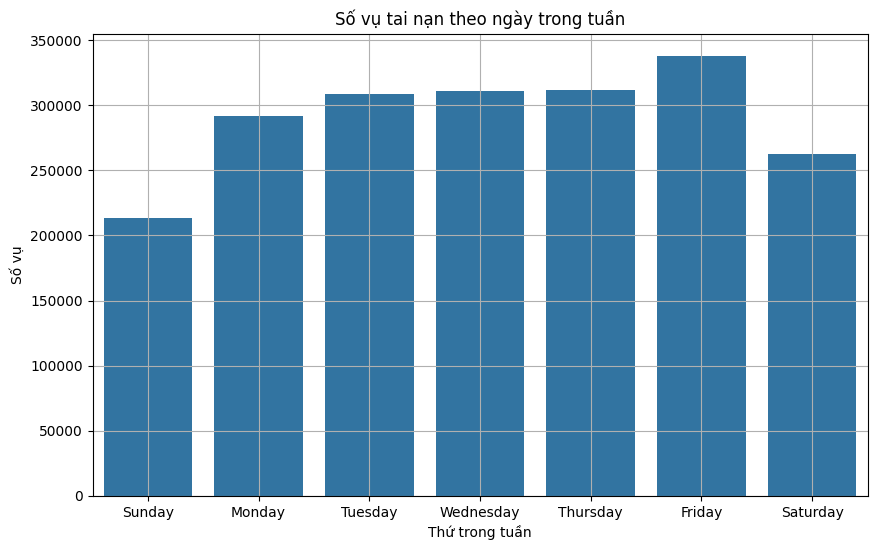

In [ ]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Day_of_Week', order=days)
plt.title('Số vụ tai nạn theo ngày trong tuần')
plt.xlabel('Thứ trong tuần')
plt.ylabel('Số vụ')
plt.grid(True)
plt.show()

Thứ Sáu có số vụ tai nạn cao nhất, theo sau là các ngày trong tuần (thứ Hai đến thứ Năm).

Chủ Nhật là ngày ít tai nạn nhất, có thể do lưu lượng xe ít hơn.

Nhận xét tổng quan: Tai nạn xảy ra chủ yếu trong các ngày làm việc, có thể do mật độ giao thông cao, tâm lý vội vàng và căng thẳng.


### 3. Xu hướng tai nạn theo mùa và năm


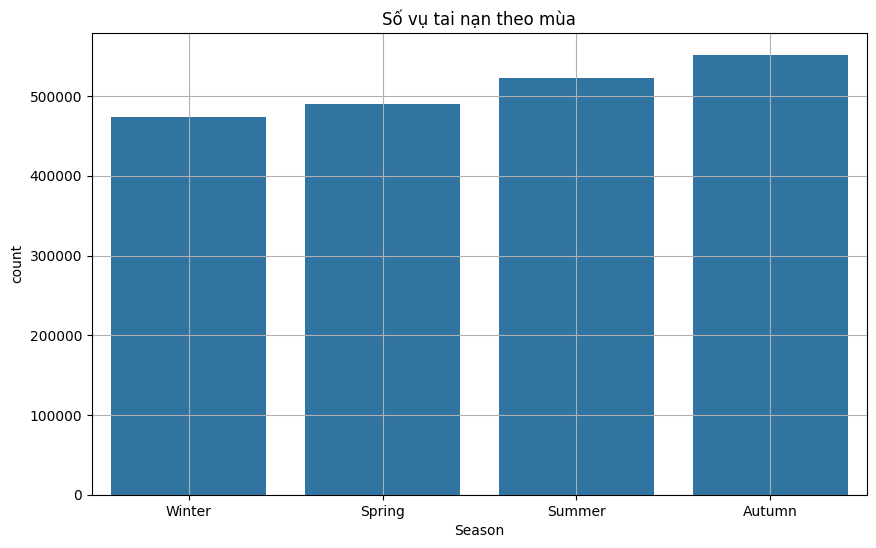

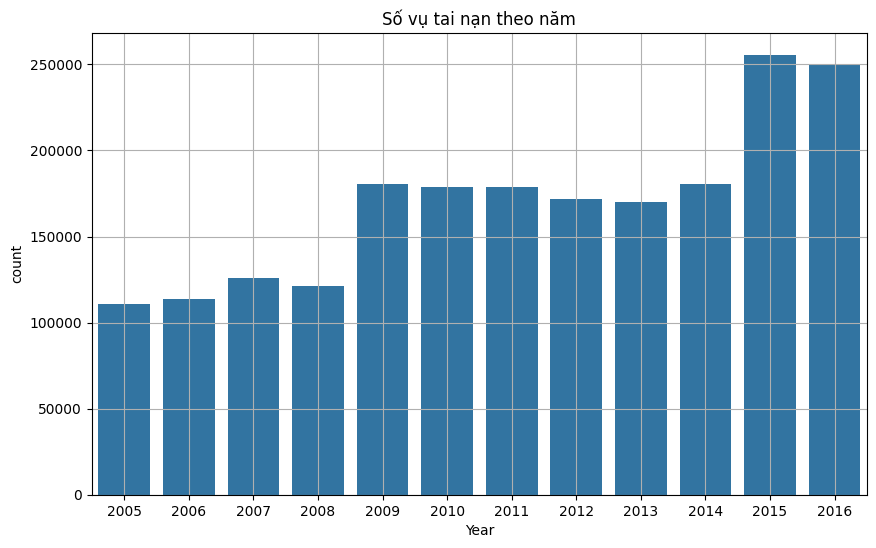

In [ ]:
# Đếm số vụ theo mùa
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Season')
plt.title('Số vụ tai nạn theo mùa')
plt.grid(True)
plt.show()

# Xu hướng theo năm
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Year')
plt.title('Số vụ tai nạn theo năm')
plt.grid(True)
plt.show()

Mùa Thu ghi nhận số vụ tai nạn cao nhất, sau đó là mùa Hè.

Mùa Đông có ít tai nạn hơn – có thể do thời tiết lạnh khiến người dân hạn chế ra đường.


Xu hướng tăng rõ rệt từ 2005 đến 2016, đặc biệt tăng mạnh vào giai đoạn 2014–2016.

Giai đoạn 2010–2013 có phần chững lại hoặc giảm nhẹ.

Nhận xét tổng quan:

- Sự gia tăng số vụ tai nạn theo thời gian phản ánh sự phát triển giao thông nhưng cũng cho thấy vấn đề an toàn chưa được cải thiện tương xứng.

- Các mùa khô (Hè, Thu) có mật độ giao thông cao hơn, dẫn đến tai nạn nhiều hơn. Cần chú ý tăng cường quản lý giao thông trong những mùa này.


### 4. So sánh tần suất tai nạn cuối tuần và ngày thường


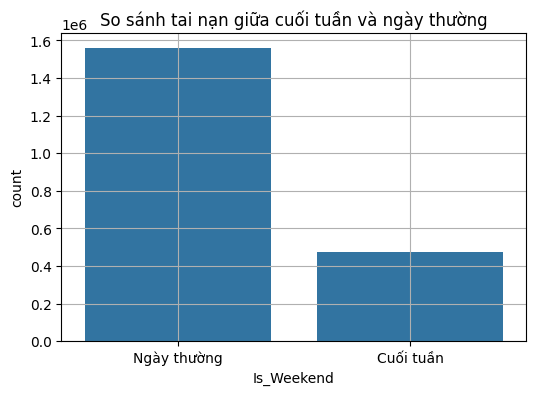

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Is_Weekend')
plt.title('So sánh tai nạn giữa cuối tuần và ngày thường')
plt.xticks([0,1], ['Ngày thường', 'Cuối tuần'])
plt.grid(True)
plt.show()

Các vụ tai nạn xảy ra nhiều ở ngày trong tuần, có thể do ngày thường là thời gian làm việc nên mật độ giao thông nhiều dễ gây tai nạn hơn ở thời điểm cuối tuần

Đề xuất các giải pháp điều tiết giao thông ở các tuyến đường hay xảy ra


### 5. Phân tích theo các khoảng thời gian (Time_Period)


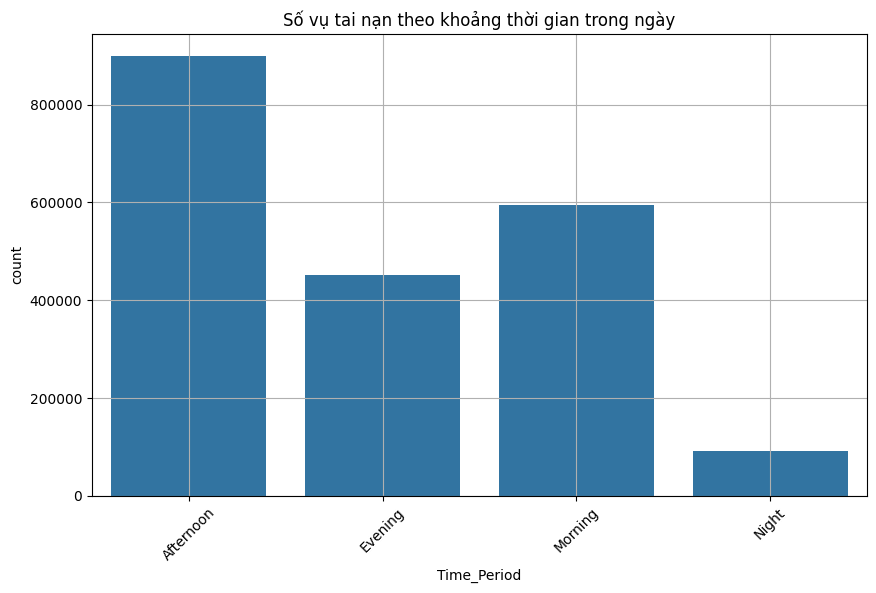

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Time_Period', order=sorted(df['Time_Period'].dropna().unique()))
plt.title('Số vụ tai nạn theo khoảng thời gian trong ngày')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Tai nạn tập trung vào các khoảng thời gian sáng và chiều, trùng với giờ cao điểm.

Trưa và đêm số vụ tai nạn giảm mạnh.

Cần chú ý kiểm soát giao thông vào các khung giờ cao điểm để giảm thiểu tai nạn.


## 3.2 Phân tích theo địa điểm và điều kiện đặc biệt


### Phân bổ tai nạn theo địa lý


In [ ]:
df_sample = df.sample(20000, random_state=42)

# Vẽ bản đồ phân bố tai nạn
fig = px.scatter_mapbox(
    df_sample,
    lat="Latitude",
    lon="Longitude",
    color="Accident_Severity",
    hover_data=["Accident_Severity", "Number_of_Casualties", "Weather_Conditions"],
    
    zoom=5,
    height=700,
    title="Phân bố tai nạn giao thông tại UK (2005–2014)"
)

# Sử dụng bản đồ nền Mapbox
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5456\3947259704.py:4: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


Tai nạn tập trung chủ yếu ở vùng trung tâm và phía Nam của nước Anh, đặc biệt là London, nổi bật như một “rừng chấm đỏ” đại diện cho các vụ tai nạn có mức độ nhẹ (Slight). Không ngạc nhiên, khi London là trung tâm dân cư, kinh tế và giao thông lớn nhất của UK.

Tiến về phía Bắc Scotland và các vùng nông thôn, mật độ tai nạn giảm rõ rệt. Tuy nhiên, chúng ta không thể bỏ qua sự xuất hiện của những chấm xanh lá rải rác là tai nạn Fatal nằm ở những đoạn đường vắng.


### Mức độ nghiêm trọng tai nạn giữa đô thị và nông thôn


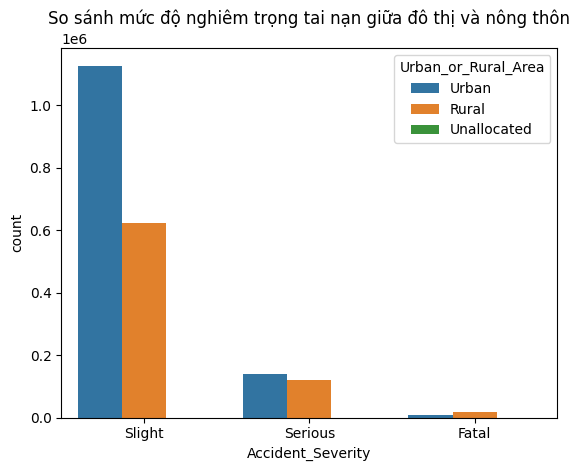

In [ ]:
sns.countplot(data=df, x='Accident_Severity', hue='Urban_or_Rural_Area')
plt.title('So sánh mức độ nghiêm trọng tai nạn giữa đô thị và nông thôn')
plt.show()


- Tai nạn nhẹ (Slight):
  Chiếm tỷ trọng lớn nhất trong tất cả các mức độ nghiêm trọng.

Khu vực đô thị (Urban) có số lượng tai nạn nhẹ cao vượt trội (~1.1 triệu), gần gấp đôi so với khu vực nông thôn (Rural) (~0.6 triệu).

Điều này có thể do mật độ giao thông cao ở đô thị, dẫn đến nhiều va chạm nhẹ.

- Tai nạn nghiêm trọng (Serious):
  Số lượng giữa đô thị và nông thôn gần tương đương nhau, nhưng đô thị vẫn nhỉnh hơn một chút.

Điều này cho thấy nguy cơ tai nạn nghiêm trọng không quá phụ thuộc vào khu vực mà có thể do các yếu tố khác như tốc độ, thời tiết, hay điều kiện đường xá.

- Tai nạn chết người (Fatal):
  Ngược lại với hai mức trên, tai nạn chết người ở nông thôn lại nhỉnh hơn đô thị.

Mặc dù con số tuyệt đối nhỏ, nhưng đây là điểm quan trọng:

Nông thôn thường có đường vắng, xe chạy nhanh hơn, thiếu ánh sáng và cấp cứu chậm → dẫn đến nguy cơ tử vong cao hơn.


### Mức độ nghiêm trọng giữa đô thị và nông thôn


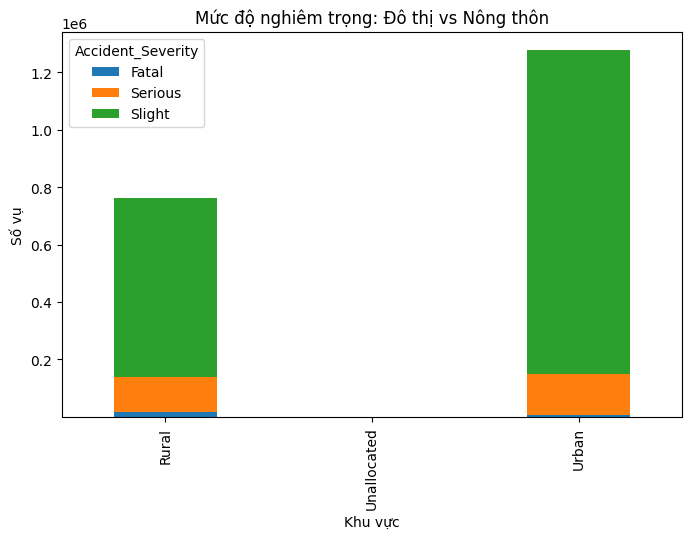

In [ ]:

severity_area = df.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()
severity_area.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Mức độ nghiêm trọng: Đô thị vs Nông thôn")
plt.ylabel("Số vụ")
plt.xlabel("Khu vực")
plt.show()

- Tai nạn ở đô thị (Urban):
  Có tổng số vụ tai nạn cao nhất (~1.3 triệu).

Phần màu xanh lá cây (tai nạn nhẹ) chiếm tỷ lệ áp đảo → tức là phần lớn tai nạn ở đô thị là nhẹ.

Tai nạn nghiêm trọng và tử vong cũng có, nhưng chiếm tỷ lệ nhỏ.

- Tai nạn ở nông thôn (Rural):
  Số vụ tai nạn thấp hơn nhiều so với đô thị (~750,000 vụ).

Tuy nhiên, phần màu cam (Serious) và màu xanh dương (Fatal) chiếm tỷ lệ lớn hơn so với đô thị → nghĩa là tai nạn ở nông thôn thường nghiêm trọng hơn.


### Các yếu tố môi trường khác nhau giữa đô thị và nông thôn


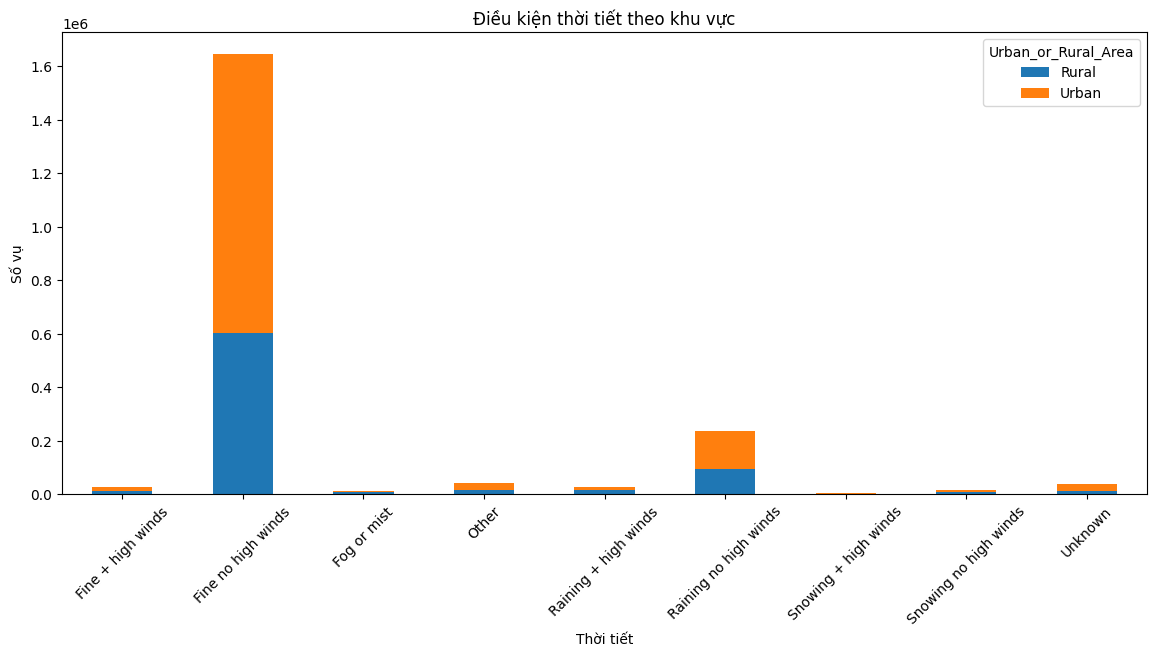

In [ ]:
env_urban_rural = df.groupby(['Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack(fill_value=0)

# Loại bỏ khu vực 'Unallocated'
env_urban_rural = env_urban_rural.drop('Unallocated', errors='ignore')

# Vẽ biểu đồ
env_urban_rural.T.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Điều kiện thời tiết theo khu vực")
plt.ylabel("Số vụ")
plt.xlabel("Thời tiết")
plt.xticks(rotation=45)
plt.show()


Thời tiết "Fine no high winds" (Trời quang, không gió mạnh) là điều kiện xảy ra đa số vụ tai nạn:

- Áp đảo hoàn toàn so với các điều kiện thời tiết khác.

- Điều này cho thấy: phần lớn tai nạn xảy ra trong điều kiện thời tiết tốt, có thể do mật độ phương tiện cao, chủ quan khi lái xe hoặc hành vi vi phạm giao thông.

"Raining no high winds" (Mưa, không gió mạnh) là điều kiện gây tai nạn đứng thứ hai:

- Đáng chú ý là cả khu vực đô thị và nông thôn đều có số lượng tai nạn khá cao trong thời tiết mưa nhẹ.

- Nguy cơ trượt bánh, giảm tầm nhìn, hoặc phanh kém hiệu quả là những nguyên nhân có thể góp phần.

Các điều kiện "Snowing", "Fog", "High winds" có số vụ tương đối thấp:

- Có thể do ít xuất hiện hơn trong thực tế hoặc khi điều kiện khắc nghiệt, người dân cẩn trọng hơn/ít di chuyển hơn.


### Tỷ lệ tai nạn theo giới hạn tốc độ


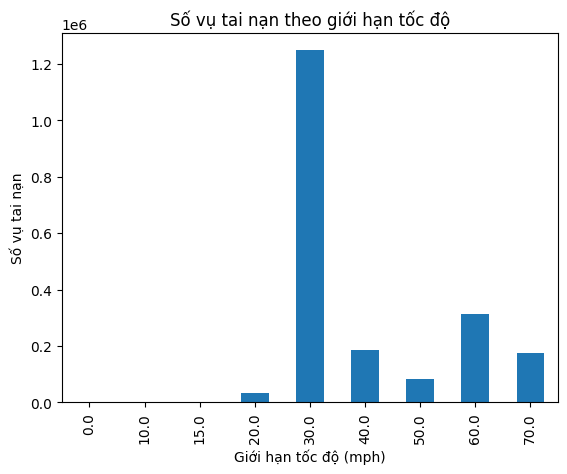

In [ ]:

speed_accidents = df['Speed_limit'].value_counts().sort_index()
speed_accidents.plot(kind='bar')
plt.title('Số vụ tai nạn theo giới hạn tốc độ')
plt.xlabel('Giới hạn tốc độ (mph)')
plt.ylabel('Số vụ tai nạn')
plt.show()


Tốc độ 30 mph là mức gây tai nạn nhiều nhất, chiếm áp đảo so với các giới hạn tốc độ khác — hơn 1.2 triệu vụ. Đây thường là giới hạn trong khu vực đô thị, khu dân cư đông đúc, mật độ phương tiện cao.

Các tốc độ khác như 60 mph, 40 mph và 70 mph cũng ghi nhận số vụ đáng kể nhưng thấp hơn nhiều so với 30 mph:

- 60 mph thường là đường quốc lộ hoặc vành đai.

- 40 & 70 mph có thể là các tuyến đường chính hoặc cao tốc.

Tốc độ thấp (0–20 mph) và một số mức trung gian như 50 mph có số vụ tai nạn thấp hơn đáng kể.

Dạng biểu đồ cho thấy một mối liên hệ giữa mật độ phương tiện và tai nạn hơn là chỉ riêng tốc độ: tốc độ trung bình (30 mph) nguy hiểm không phải vì nhanh, mà vì đông.


### Mức độ nghiêm trọng theo giới hạn tốc độ


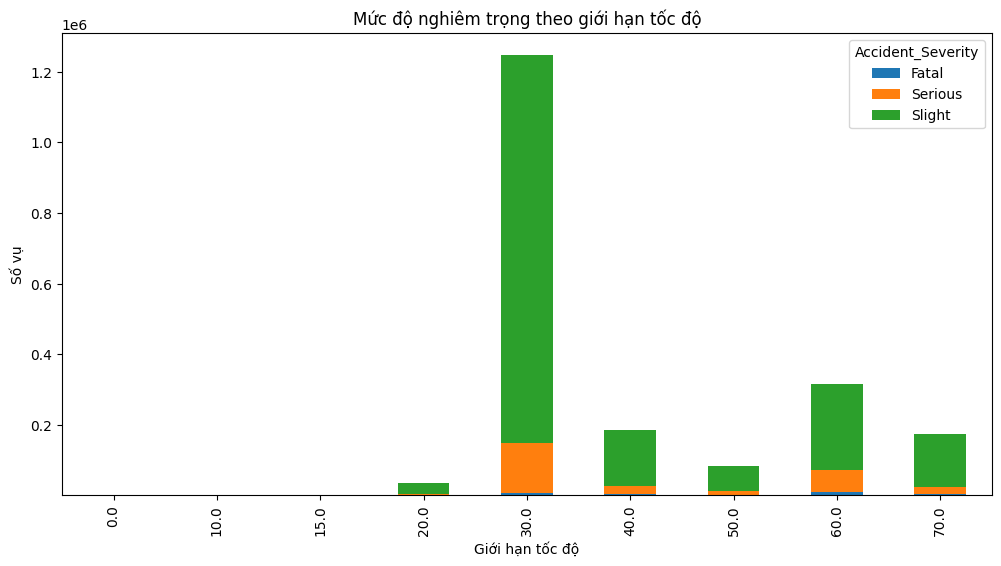

In [ ]:

severity_speed = df.groupby(['Speed_limit', 'Accident_Severity']).size().unstack(fill_value=0)
severity_speed.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Mức độ nghiêm trọng theo giới hạn tốc độ")
plt.xlabel("Giới hạn tốc độ")
plt.ylabel("Số vụ")
plt.show()

Tốc độ 30 mph vẫn là mức có số vụ tai nạn nhiều nhất, với phần lớn các vụ thuộc mức Slight (nhẹ) — chiếm phần lớn tổng số vụ tại tốc độ này.

Mức nghiêm trọng Serious (nghiêm trọng) cũng chiếm tỷ lệ đáng kể tại 30 mph, thể hiện tại đây có nhiều vụ tai nạn có hậu quả nghiêm trọng hơn.

Mức nghiêm trọng Fatal (tử vong) tuy nhỏ nhưng vẫn xuất hiện ở hầu hết các mức tốc độ, với tần suất nhỏ nhất so với hai mức còn lại.

Các mức tốc độ 40 mph, 60 mph và 70 mph cũng có số vụ tai nạn thuộc mức Slight và Serious khá lớn, với Slight chiếm đa số, nghiêm trọng ít hơn.

Các tốc độ thấp (0, 10, 15 mph) hầu như không có tai nạn ghi nhận.


### Điều kiện đặc biệt tại hiện trường và mức độ nghiêm trọng


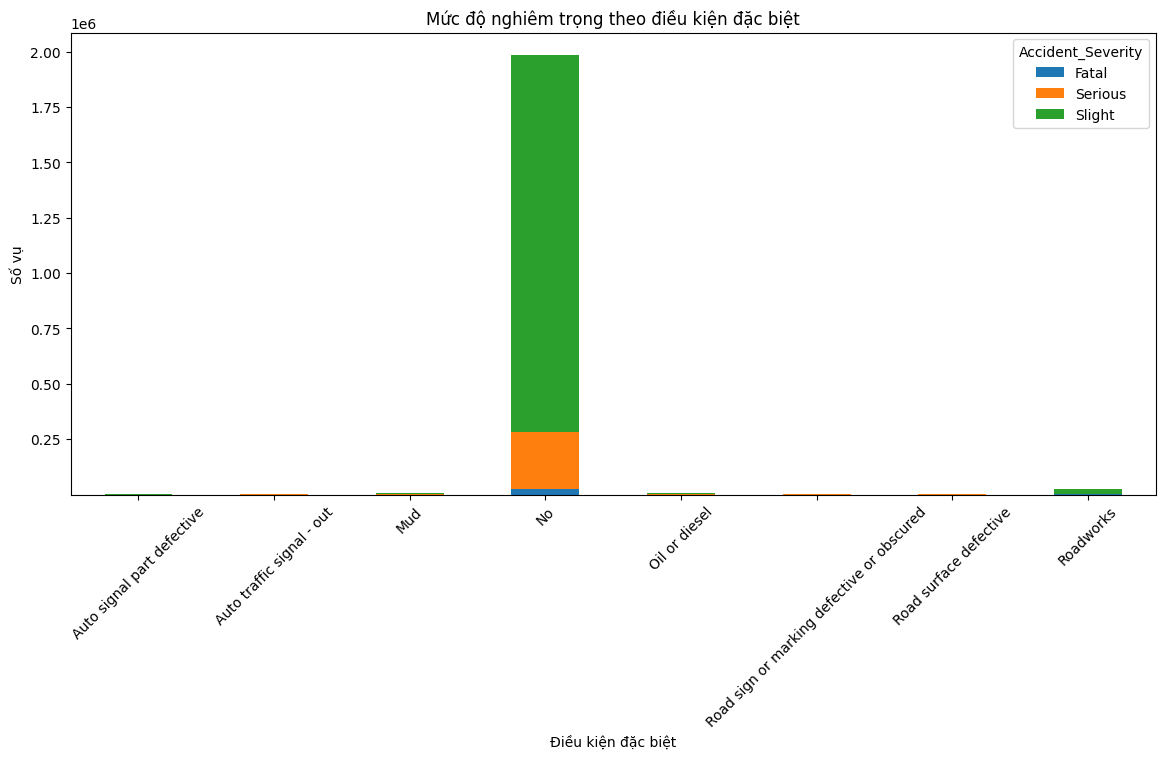

In [ ]:

special_severity = df.groupby(['Special_Conditions_at_Site', 'Accident_Severity']).size().unstack(fill_value=0)
special_severity.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Mức độ nghiêm trọng theo điều kiện đặc biệt")
plt.ylabel("Số vụ")
plt.xlabel("Điều kiện đặc biệt")
plt.xticks(rotation=45)
plt.show()

Điều kiện đặc biệt "No" (tức không có điều kiện đặc biệt nào) chiếm số vụ tai nạn áp đảo, với phần lớn các vụ thuộc mức Slight (nhẹ) và một phần đáng kể là Serious (nghiêm trọng), còn mức Fatal (tử vong) nhỏ hơn nhưng vẫn hiện diện.

Các điều kiện đặc biệt khác như Roadworks, Mud, Oil or diesel, Road surface defective, Road sign or marking defective or obscured, Auto traffic signal - out, Auto signal part defective đều có số vụ tai nạn nhỏ hơn nhiều so với "No".

Trong các điều kiện này, Roadworks có số vụ tai nạn nhẹ (Slight) khá đáng kể so với các điều kiện khác, nhưng tổng số vụ vẫn nhỏ hơn nhiều so với "No".

Hầu hết các điều kiện đặc biệt đều có số vụ nghiêm trọng (Serious, Fatal) rất thấp hoặc gần như không đáng kể so với tổng số vụ.

-> Phần lớn tai nạn xảy ra khi không có điều kiện đặc biệt nào (điều kiện bình thường).


### Biển báo tạm thời và công trình xây dựng


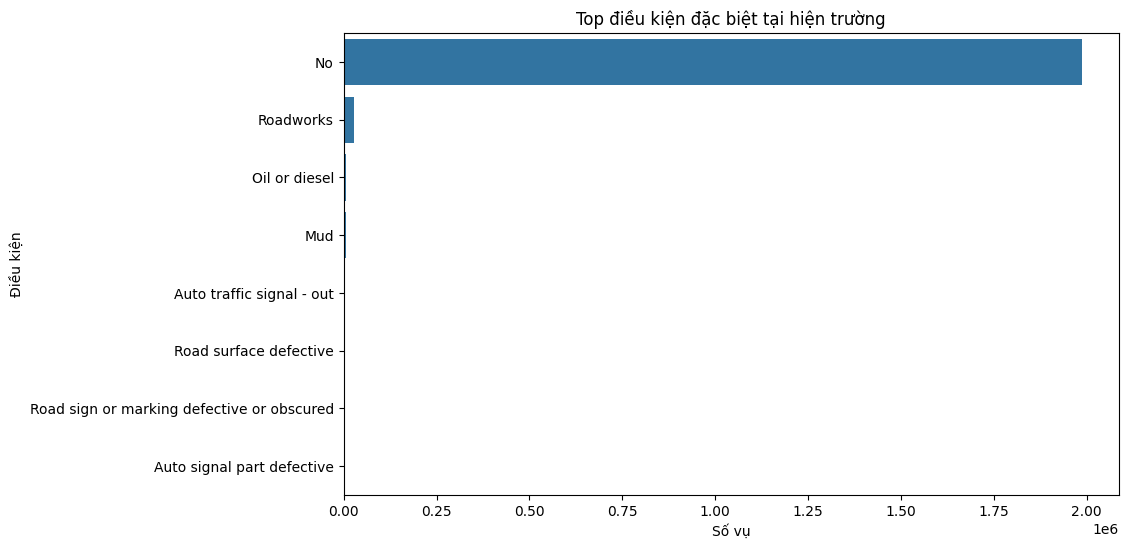

In [ ]:

temp_conditions = df['Special_Conditions_at_Site'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=temp_conditions.index, x=temp_conditions.values)
plt.title("Top điều kiện đặc biệt tại hiện trường")
plt.xlabel("Số vụ")
plt.ylabel("Điều kiện")
plt.show()

Điều kiện "No" (tức không có điều kiện đặc biệt nào) có số vụ tai nạn áp đảo, cho thấy phần lớn các vụ tai nạn xảy ra trong điều kiện bình thường, không có yếu tố ảnh hưởng từ môi trường.

Các yếu tố như đường đang sửa chữa (Roadworks), bề mặt đường bị lỗi (Road surface defective) và dầu hoặc diesel (Oil or diesel) có số vụ tai nạn đáng kể hơn so với các yếu tố khác.

Những yếu tố như biển báo bị che khuất hoặc hỏng (Road sign or marking defective or obscured) và đèn giao thông tự động hỏng (Auto traffic signal - out) có số vụ tai nạn thấp hơn nhiều.


### Các vấn đề về thiết kế đường có làm tăng nguy cơ tai nạn không?


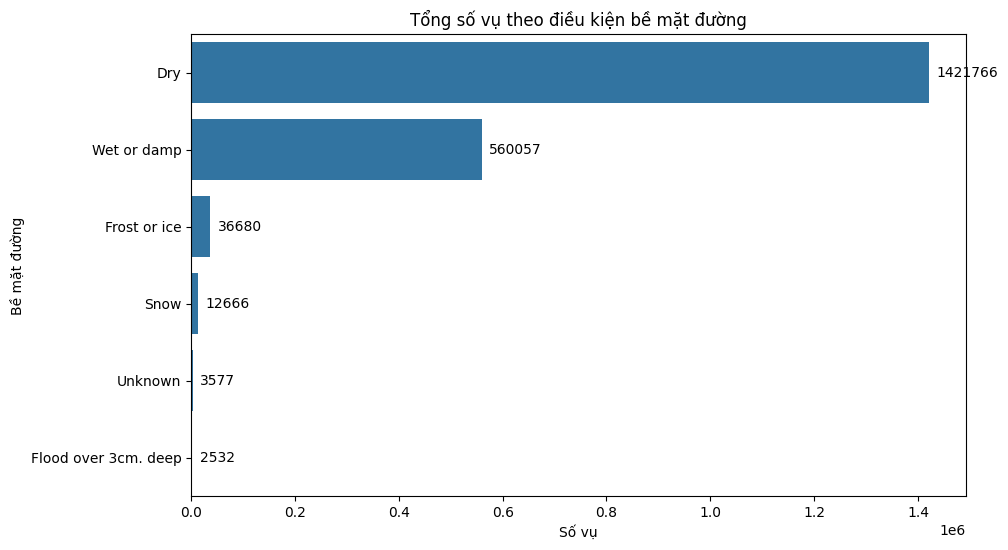

In [ ]:
design_issues = df['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(y=design_issues.index, x=design_issues.values)
plt.title("Tổng số vụ theo điều kiện bề mặt đường")
plt.xlabel("Số vụ")
plt.ylabel("Bề mặt đường")

# Thêm số liệu chi tiết lên từng thanh
for i, v in enumerate(design_issues.values):
    ax.text(v + max(design_issues.values)*0.01, i, str(v), color='black', va='center')

plt.show()

Điều kiện mặt đường khô chiếm đa số: Số vụ tai nạn xảy ra trên mặt đường khô cao nhất, với 1,421,766 vụ.

Mặt đường ướt hoặc ẩm đứng thứ hai: Điều kiện mặt đường ướt hoặc ẩm có số vụ tai nạn đứng thứ hai, với 560,057 vụ.

Các điều kiện bất lợi khác có số vụ thấp hơn đáng kể: Các điều kiện như băng giá, tuyết, ngập úng (trên 3cm) và không xác định có số vụ tai nạn thấp hơn nhiều so với mặt đường khô và ướt.

Sự khác biệt lớn: Có một sự khác biệt rất lớn giữa số vụ tai nạn xảy ra trên mặt đường khô so với tất cả các điều kiện khác cộng lại.


## 3.3 Phân tích ảnh hưởng của môi trường


### 1. Phân tích ảnh hưởng của thời tiết


### Thống kê các loại điều kiện thời tiết phổ biến


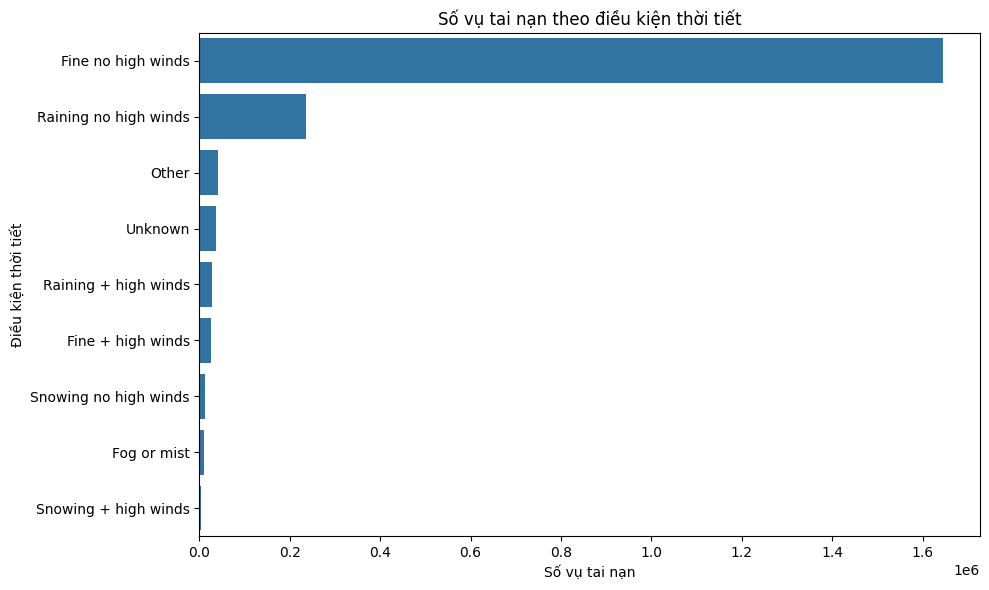

In [ ]:
# Phân phối số vụ tai nạn theo điều kiện thời tiết
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index)
plt.title('Số vụ tai nạn theo điều kiện thời tiết')
plt.xlabel('Số vụ tai nạn')
plt.ylabel('Điều kiện thời tiết')
plt.tight_layout()
plt.show()

- **Điều kiện thời tiết phổ biến nhất khi xảy ra tai nạn là "Fine no high winds" (trời đẹp, không có gió)**, với hơn **1.6 triệu vụ** – chiếm khoảng **80%** tổng số tai nạn.
- Xếp sau đó là `"Raining no high winds"` (mưa không có gió lớn) với hơn **200,000 vụ**, tương đương khoảng **11.5%**.
- Các điều kiện thời tiết khắc nghiệt khác xuất hiện với **tỷ lệ rất nhỏ**, chỉ từ vài nghìn đến vài chục nghìn vụ.

- Tần suất tai nạn cao nhất vào lúc **thời tiết đẹp** cho thấy: **trời quang không đồng nghĩa với an toàn**. Điều này có thể do tâm lý chủ quan, tăng tốc độ, hoặc mật độ xe cao hơn trong thời tiết tốt.


### Mức độ nghiêm trọng tai nạn theo từng điều kiện thời tiết


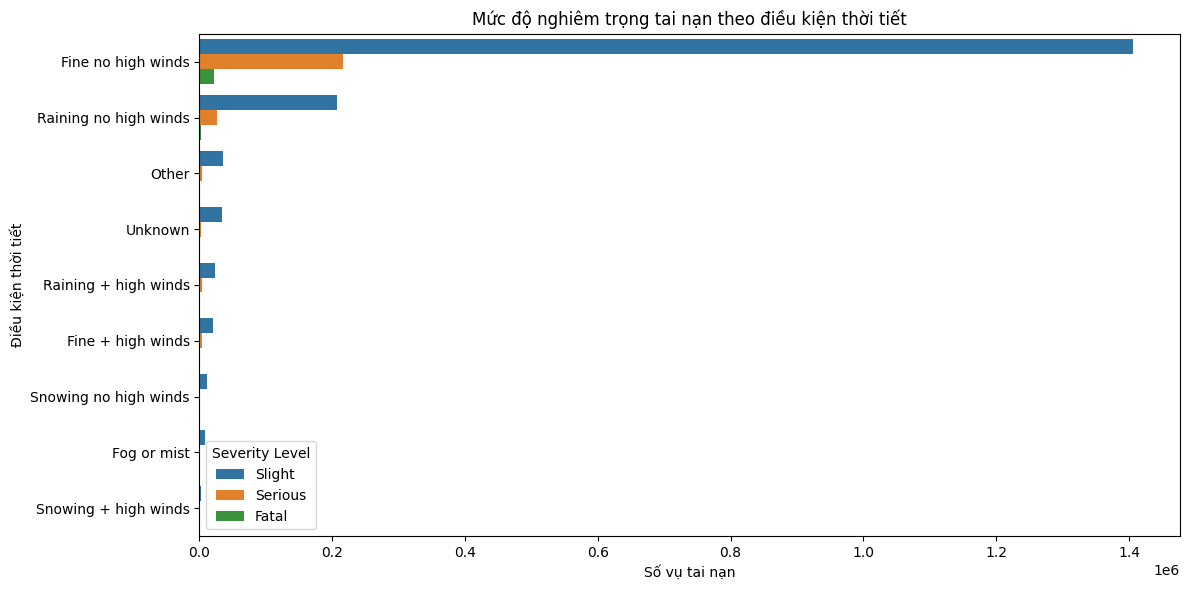

In [ ]:
# Mức độ nghiêm trọng theo điều kiện thời tiết
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Weather_Conditions', hue='Accident_Severity', order=df['Weather_Conditions'].value_counts().index)
plt.title('Mức độ nghiêm trọng tai nạn theo điều kiện thời tiết')
plt.xlabel('Số vụ tai nạn')
plt.ylabel('Điều kiện thời tiết')
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()

- **Phần lớn tai nạn ở tất cả các điều kiện thời tiết đều thuộc nhóm Slight (nhẹ)**

- **Không phải điều kiện thời tiết xấu là nơi có nhiều tai nạn nhất**, nhưng **chúng thường đi kèm mức độ nghiêm trọng cao hơn**.
- Trong khi đó, điều kiện "Fine no high winds" (trời đẹp) có số vụ tai nạn nghiêm trọng vượt trội điều này một phần do tần suất thời tiết đẹp cao hơn

  **Kết luận**:

  Mặc dù **thời tiết xấu xảy ra ít hơn**, nhưng tỷ lệ tai nạn nghiêm trọng khi xảy ra lại **cao hơn đáng kể**. Điều này cho thấy cần cảnh báo và quản lý rủi ro tốt hơn trong những ngày mưa gió, sương mù hay băng tuyết.


### Sự khác biệt giữa đô thị và nông thôn


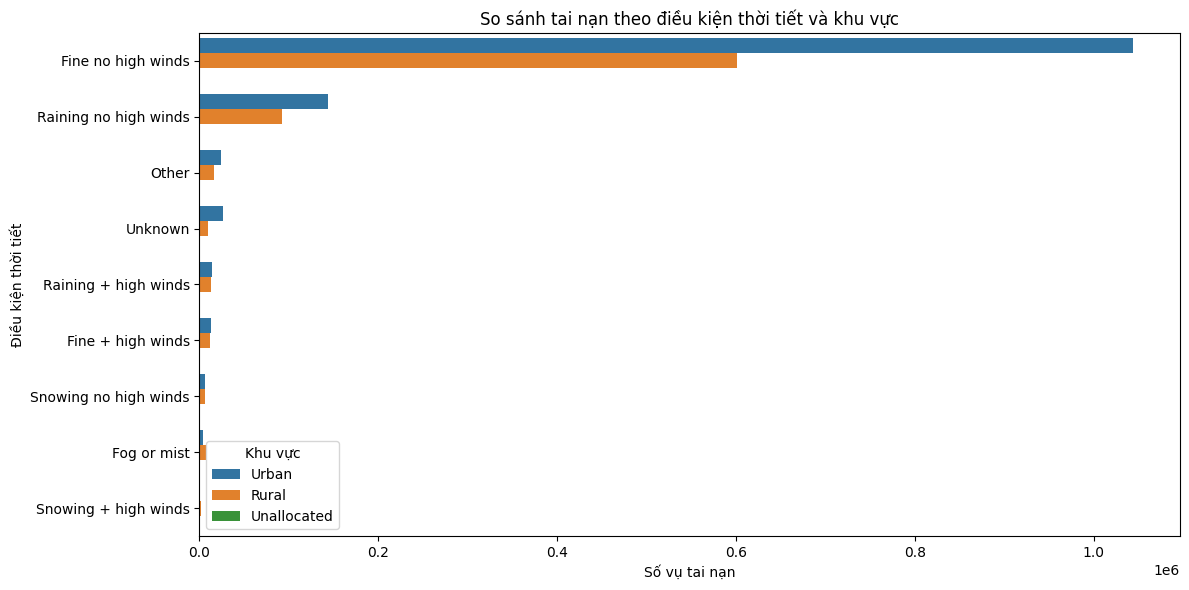

In [53]:
# So sánh số lượng tai nạn theo thời tiết và khu vực
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Weather_Conditions', hue='Urban_or_Rural_Area', order=df['Weather_Conditions'].value_counts().index)
plt.title('So sánh tai nạn theo điều kiện thời tiết và khu vực')
plt.xlabel('Số vụ tai nạn')
plt.ylabel('Điều kiện thời tiết')
plt.legend(title='Khu vực')
plt.tight_layout()
plt.show()

#### 1. Thời tiết đẹp – tai nạn vẫn nhiều nhất, đặc biệt ở đô thị

- Điều kiện `"Fine no high winds"` chiếm đa số ở cả hai khu vực, với lượng tai nạn ở **đô thị cao hơn rõ rệt** so với nông thôn.
- Điều này không đồng nghĩa thời tiết tốt là an toàn hơn. Trên thực tế, tai nạn nhiều hơn có thể đến từ:
  - **Mật độ phương tiện cao** trong đô thị vào thời tiết đẹp
  - **Tâm lý chủ quan** của người tham gia giao thông: tăng tốc độ, giảm chú ý
  - **Hoạt động giao thông phức tạp hơn**: nhiều phương tiện giao cắt, đông người qua đường, v.v.

#### 2. Thời tiết mưa – nông thôn có số tai nạn cao hơn

- Trong điều kiện `"Raining no high winds"`, số vụ tai nạn ở khu vực **nông thôn gần bằng hoặc cao hơn đô thị**, trong khi tổng số vụ ở đô thị vẫn chiếm đa số toàn bộ dataset.
- Một số lý do khả thi:
  - Nông thôn thường có **hệ thống thoát nước kém**, dễ trơn trượt khi mưa.
  - **Thiếu đèn đường, thiếu biển cảnh báo hoặc dải phân cách** khi trời mưa giảm tầm nhìn.
  - Người dân nông thôn **thường lái xe với tốc độ cao hơn** trên đường ít xe hơn, khi gặp mưa có thể dẫn đến mất kiểm soát.

#### Kết luận

- **Khu vực đô thị có số lượng tai nạn cao hơn**, nhưng chủ yếu xảy ra khi thời tiết đẹp – có thể liên quan đến **mật độ xe và hành vi lái xe trong môi trường đô thị**.
- Trong khi đó, **nông thôn xuất hiện nhiều hơn trong các điều kiện thời tiết bất lợi** – cho thấy môi trường dễ tổn thương hơn trong thời tiết xấu.
- Đây là cơ sở hợp lý để:
  - Tăng cường **cảnh báo thời tiết** và biển báo nguy hiểm tại nông thôn
  - Tập trung **nâng cấp cơ sở hạ tầng** giao thông nông thôn trong điều kiện thời tiết khắc nghiệt


### Thời tiết xấu theo mùa


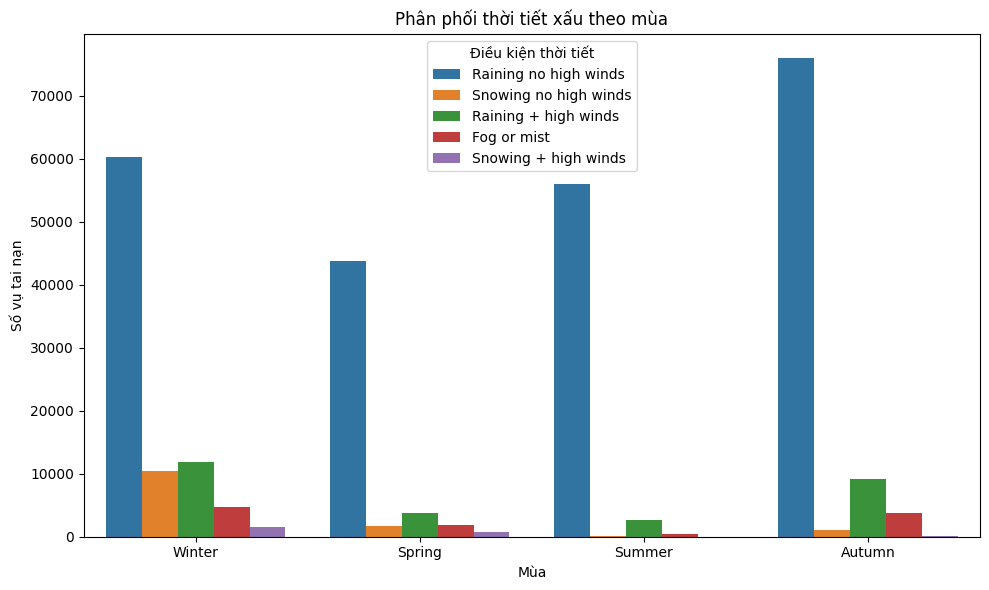

In [54]:
# Chọn các điều kiện thời tiết xấu
bad_weather = ['Raining no high winds', 'Raining + high winds', 'Fog or mist', 'Snowing no high winds', 'Snowing + high winds']

# Lọc dữ liệu
df_bad_weather = df[df['Weather_Conditions'].isin(bad_weather)]

# Biểu đồ phân phối thời tiết xấu theo mùa
plt.figure(figsize=(10,6))
sns.countplot(data=df_bad_weather, x='Season', hue='Weather_Conditions')
plt.title('Phân phối thời tiết xấu theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Số vụ tai nạn')
plt.legend(title='Điều kiện thời tiết')
plt.tight_layout()
plt.show()

Biểu đồ này thể hiện số vụ tai nạn giao thông xảy ra dưới các điều kiện thời tiết xấu, được phân loại theo bốn mùa trong năm: **Winter, Spring, Summer, Autumn**.

#### Nhận xét tổng quan

- Trong tất cả các mùa, **mưa không có gió mạnh (Raining no high winds)** là điều kiện thời tiết xấu gây tai nạn nhiều nhất.

  - Mùa **Autumn (Thu)** dẫn đầu với hơn **75,000 vụ tai nạn** trong điều kiện này.
  - Tiếp theo là mùa **Winter (Đông)** và **Summer (Hè)** với hơn **60,000–70,000 vụ**.
  - **Spring (Xuân)** có ít tai nạn do mưa nhất.

- **Sương mù (Fog or mist)** và **gió mạnh kèm mưa (Raining + high winds)** có số vụ tai nạn thấp hơn, tập trung chủ yếu vào **mùa Đông và mùa Thu**.

- **Tuyết (Snowing no/high winds)** gần như chỉ xuất hiện ở **Winter**, chiếm tỷ lệ nhỏ nhưng có tính đặc trưng mùa rõ rệt.

#### Diễn giải

- **Mùa Thu là mùa có nguy cơ tai nạn cao nhất liên quan đến thời tiết xấu**, đặc biệt là do mưa. Điều này có thể do:

  - Mưa kéo dài kết hợp với lá rụng làm đường trơn trượt
  - Tầm nhìn kém hơn khi sương mù và gió lạnh xuất hiện

- **Mùa Đông đa dạng hơn về loại thời tiết nguy hiểm**, không chỉ có mưa mà còn có tuyết, sương mù và gió mạnh. Mặc dù tổng số tai nạn không cao nhất, nhưng tiềm ẩn nhiều rủi ro nghiêm trọng hơn.

- **Mùa Hè gây bất ngờ với số tai nạn do mưa khá cao**. Có thể do mưa bất chợt khiến người điều khiển không kịp phản ứng, hoặc do đường bị trơn do bụi lâu ngày không được rửa trôi.

#### Kết luận

> Mùa **Thu** và **Đông** là hai mùa cần đặc biệt lưu ý về nguy cơ tai nạn do thời tiết xấu. Các cơ quan chức năng cần ưu tiên cảnh báo, kiểm tra biển báo, và duy trì chất lượng mặt đường tốt hơn trong các mùa này để giảm thiểu rủi ro.


### 2. Phân tích điều kiện mặt đường


### Loại mặt đường nào thường gặp tai nạn nhất


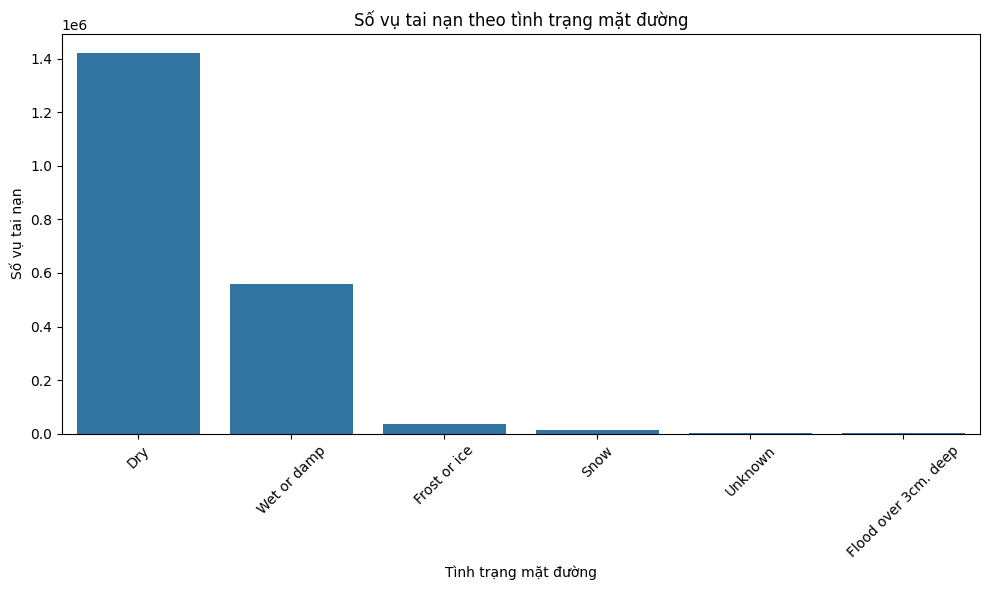

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Road_Surface_Conditions', order=df['Road_Surface_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Số vụ tai nạn theo tình trạng mặt đường")
plt.xlabel("Tình trạng mặt đường")
plt.ylabel("Số vụ tai nạn")
plt.tight_layout()
plt.show()

- **"Dry" (mặt đường khô)** là điều kiện xảy ra nhiều tai nạn nhất, với **trên 1.4 triệu vụ** – chiếm khoảng **70%** tổng số vụ tai nạn trong dữ liệu.
- **"Wet or damp" (ướt hoặc ẩm)** đứng thứ hai, với **gần 600,000 vụ**, chiếm khoảng **27–28%**.
- Các điều kiện nguy hiểm hơn như:
  - `"Frost or ice"` (băng giá): khoảng **30,000 vụ**
  - `"Snow"` (tuyết): chỉ hơn **10,000 vụ**
  - `"Flood over 3cm. deep"` (ngập nước): rất hiếm
- **"Unknown"** cũng có số lượng tương đối nhỏ và nên được loại khỏi phân tích chính thức nếu không thể xác minh được.

- **Tại sao mặt đường khô lại có nhiều tai nạn?**

  - Vì đây là **điều kiện mặt đường phổ biến nhất trong thực tế** – chiếm phần lớn thời gian trong năm, nhất là vào mùa hè và thu.
  - Trong điều kiện tốt, **người điều khiển phương tiện có xu hướng chủ quan hơn**: đi nhanh, vượt ẩu, giảm chú ý.
  - Ngoài ra, **mật độ giao thông cao hơn khi thời tiết tốt** (nhiều xe ra đường), cũng góp phần tăng xác suất tai nạn.

- **Đường ướt hoặc trơn trượt nguy hiểm hơn, nhưng ít tai nạn hơn về mặt số lượng tuyệt đối** do tần suất xuất hiện thấp hơn:

  - Đường ướt có thể gây trượt bánh, tăng quãng đường phanh, giảm độ bám đường.
  - Băng giá và tuyết là cực kỳ nguy hiểm nhưng hiếm gặp tại nhiều vùng ở Anh, trừ khu vực phía Bắc và cao nguyên.

- **Lưu ý quan trọng**: Số lượng nhiều không đồng nghĩa với độ nguy hiểm cao. Để đánh giá mức độ rủi ro, cần **chuẩn hóa theo tần suất điều kiện mặt đường xảy ra** hoặc xem xét thêm **mức độ nghiêm trọng** trong từng loại mặt đường (sẽ thực hiện ở bước 4.2).

#### Kết luận:

> Mặt đường khô chiếm tỷ lệ tai nạn cao nhất không có nghĩa là nó nguy hiểm nhất – mà do nó phổ biến nhất. Trong khi đó, các loại mặt đường trơn trượt (ướt, băng, tuyết) tuy xuất hiện ít hơn, nhưng lại **tiềm ẩn nguy cơ nghiêm trọng cao hơn**. Do đó, cần tập trung nâng cao nhận thức và có biển cảnh báo phù hợp khi gặp điều kiện mặt đường này.


### 3. Phân tích điều kiện ánh sáng


#### Tổng số tai nạn theo điều kiện ánh sáng


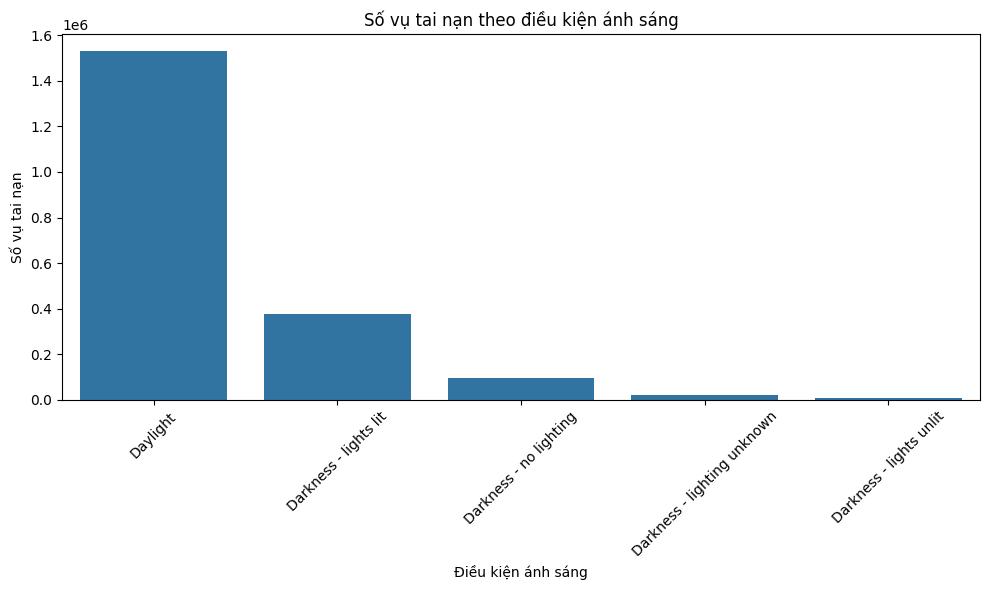

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Light_Conditions', order=df['Light_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Số vụ tai nạn theo điều kiện ánh sáng")
plt.xlabel("Điều kiện ánh sáng")
plt.ylabel("Số vụ tai nạn")
plt.tight_layout()
plt.show()

#### Nhận xét tổng quan:

- **"Daylight" (Ban ngày)** là điều kiện xảy ra nhiều tai nạn nhất, chiếm **đa số tuyệt đối**, với **hơn 1.5 triệu vụ tai nạn**.
- **"Darkness – lights lit" (Tối có đèn đường)** xếp thứ hai với khoảng **400,000 vụ**.
- Các điều kiện nguy hiểm hơn như:

  - `"Darkness – no lighting"` (Tối không có đèn)
  - `"Darkness – lighting unknown"` (Tối, đèn không xác định)
  - `"Darkness – lights unlit"` (Tối, đèn không bật)

  có tổng cộng chưa đến **200,000 vụ**, nhưng cần được chú ý vì tiềm ẩn rủi ro cao.

#### Diễn giải chi tiết:

- **Tai nạn ban ngày chiếm phần lớn**, điều này hợp lý vì:

  - Hầu hết các phương tiện di chuyển vào ban ngày.
  - Mật độ giao thông cao hơn.
  - Các hành vi như vượt đèn, quay đầu, băng qua đường cũng nhiều hơn.

- Tuy nhiên, **không nên hiểu sai rằng ban ngày nguy hiểm hơn ban đêm**. Cần xem tỷ lệ tai nạn theo thời gian hoạt động hoặc phân tích mức độ nghiêm trọng (phần 5.2).

- Điều kiện ban đêm **có đèn chiếu sáng (lights lit)** hỗ trợ giảm nguy cơ, nhưng vẫn chiếm một tỷ lệ lớn tai nạn, cho thấy:
  - **Đèn đường không loại bỏ hoàn toàn rủi ro** nếu người điều khiển chủ quan hoặc đèn không đủ sáng.
- Những điều kiện **tối hoàn toàn, hoặc đèn không bật/không rõ trạng thái** có số vụ ít, nhưng có thể liên quan đến **tai nạn nghiêm trọng hơn**, sẽ được kiểm tra ở bước tiếp theo.

#### Kết luận:

> Hầu hết tai nạn xảy ra vào ban ngày – nhưng đây là do tần suất sử dụng đường cao hơn, không đồng nghĩa với nguy hiểm cao hơn. Các điều kiện ánh sáng yếu như **tối không đèn, đèn không bật, hoặc ánh sáng không rõ ràng** là môi trường **tiềm ẩn rủi ro cao** và cần phân tích tiếp theo để đánh giá mức độ nghiêm trọng liên quan.


#### Mức độ nghiêm trọng theo điều kiện ánh sáng


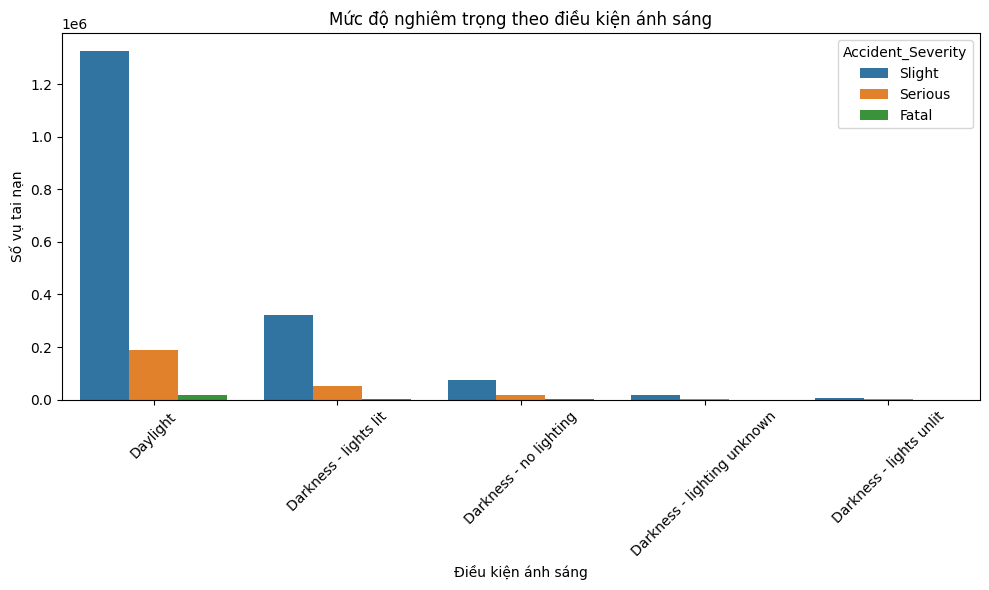

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Light_Conditions', hue='Accident_Severity', order=df['Light_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Mức độ nghiêm trọng theo điều kiện ánh sáng")
plt.xlabel("Điều kiện ánh sáng")
plt.ylabel("Số vụ tai nạn")
plt.tight_layout()
plt.show()

#### Tai nạn trong điều kiện tối (có đèn/không đèn)


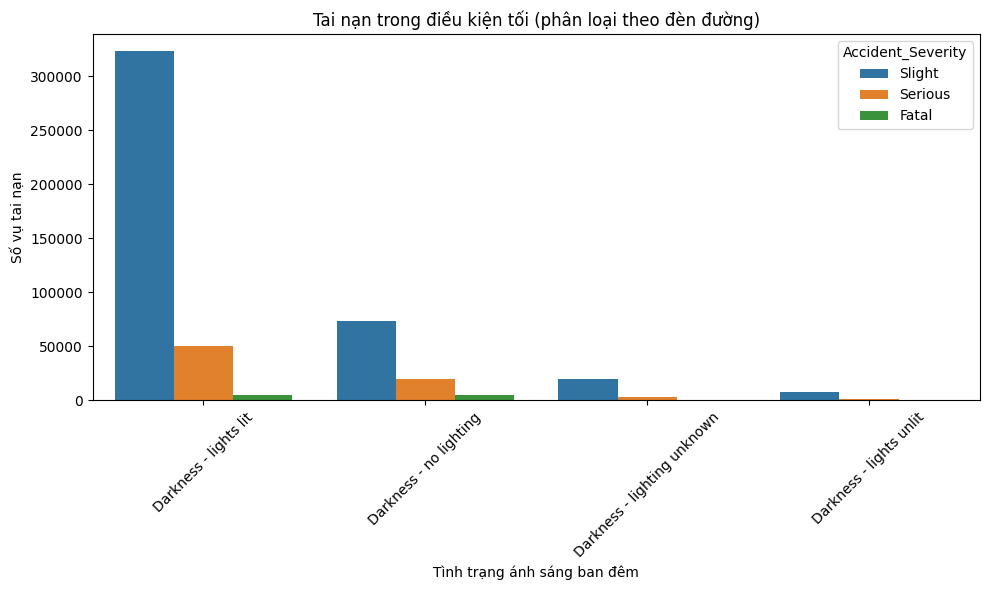

In [62]:
# Lọc các điều kiện ánh sáng chứa từ 'Darkness'
dark_conditions = df[df['Light_Conditions'].str.contains('Darkness', case=False)]

plt.figure(figsize=(10,6))
sns.countplot(data=dark_conditions, x='Light_Conditions', hue='Accident_Severity', order=dark_conditions['Light_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Tai nạn trong điều kiện tối (phân loại theo đèn đường)")
plt.xlabel("Tình trạng ánh sáng ban đêm")
plt.ylabel("Số vụ tai nạn")
plt.tight_layout()
plt.show()

#### Nhận xét tổng quan:

- **"Darkness – lights lit" (tối có đèn đường)**:

  - Là điều kiện ban đêm phổ biến nhất trong dữ liệu.
  - Tuy chiếm tỷ lệ lớn, nhưng phần lớn là các vụ tai nạn **Slight**.
  - Điều này cho thấy **đèn đường góp phần giảm bớt mức độ nghiêm trọng của tai nạn**.

- **"Darkness – no lighting" (tối không có đèn)**:

  - Số vụ tai nạn ít hơn nhiều , nhưng có tỷ lệ `Serious` rõ rệt hơn.
  - Điều này cảnh báo rằng **việc thiếu chiếu sáng có thể dẫn đến tai nạn nghiêm trọng hơn**.

- **"Darkness – lighting unknown"** và `"Fatal"`:
  - Dù số lượng thấp, vẫn có xuất hiện tai nạn, cho thấy **hệ thống đèn không hoạt động đúng hoặc không rõ trạng thái** cũng là một yếu tố rủi ro.

#### Phân tích:

- Đèn đường là yếu tố cực kỳ quan trọng giúp:

  - **Tăng tầm nhìn cho tài xế**
  - **Cảnh báo sớm các chướng ngại vật hoặc phương tiện khác**
  - **Hỗ trợ người đi bộ, xe đạp nhận diện môi trường**

- Khi thiếu đèn đường hoặc đèn tắt, người điều khiển dễ gặp:
  - **Hiện tượng chói sáng từ xe đối diện** (do mắt giãn nở thiếu ánh sáng)
  - **Phản ứng chậm với tình huống bất ngờ** (vượt đèn đỏ, băng qua đường, rẽ sai...)

#### Kết luận:

> Dữ liệu cho thấy rõ ràng: **đèn đường có tác dụng làm giảm mức độ nghiêm trọng của tai nạn vào ban đêm**.  
> Các khu vực **thiếu đèn hoặc đèn yếu, đèn không hoạt động** là các **điểm đen tiềm năng**, cần được:
>
> - **Ưu tiên nâng cấp hệ thống chiếu sáng**
> - **Theo dõi trạng thái đèn tự động**
> - **Giới hạn tốc độ ban đêm phù hợp hơn với điều kiện ánh sáng thực tế**


## 3.4 Phân tích phương tiện và người điều khiển


### 1. Phân bố tuổi và giới tính của người lái xe


Nhóm tuổi nào liên quan đến nhiều tai nạn nhất?


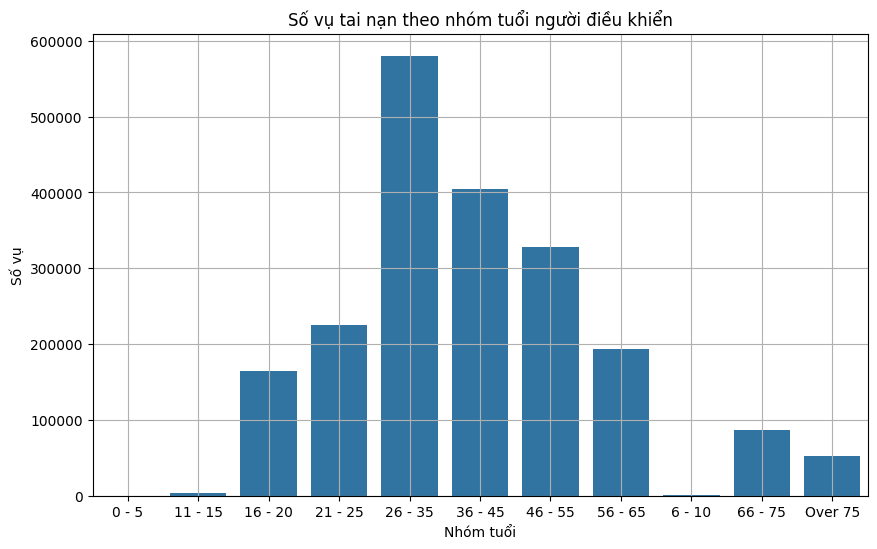

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band_of_Driver', order=sorted(df['Age_Band_of_Driver'].dropna().unique()))
plt.title('Số vụ tai nạn theo nhóm tuổi người điều khiển')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số vụ')
plt.grid(True)
plt.show()

Nhóm tuổi liên quan đến nhiều tai nạn nhất:

Biểu đồ cho thấy nhóm tuổi "26-35" và "36-45" có số vụ tai nạn cao nhất. Đây là nhóm tuổi lao động chính, thường xuyên di chuyển nên nguy cơ gặp tai nạn cao hơn.


Có sự khác biệt về tỷ lệ tai nạn theo giới tính không?


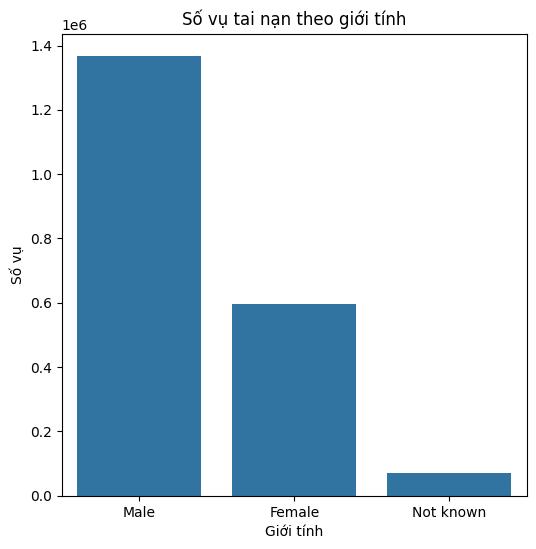

In [64]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Sex_of_Driver')
plt.title('Số vụ tai nạn theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số vụ')
plt.show()


Khác biệt về giới tính:

Số vụ tai nạn của nam giới cao hơn nữ giới rõ rệt. Điều này phản ánh thực tế nam giới thường tham gia giao thông nhiều hơn hoặc có xu hướng lái xe mạo hiểm hơn.


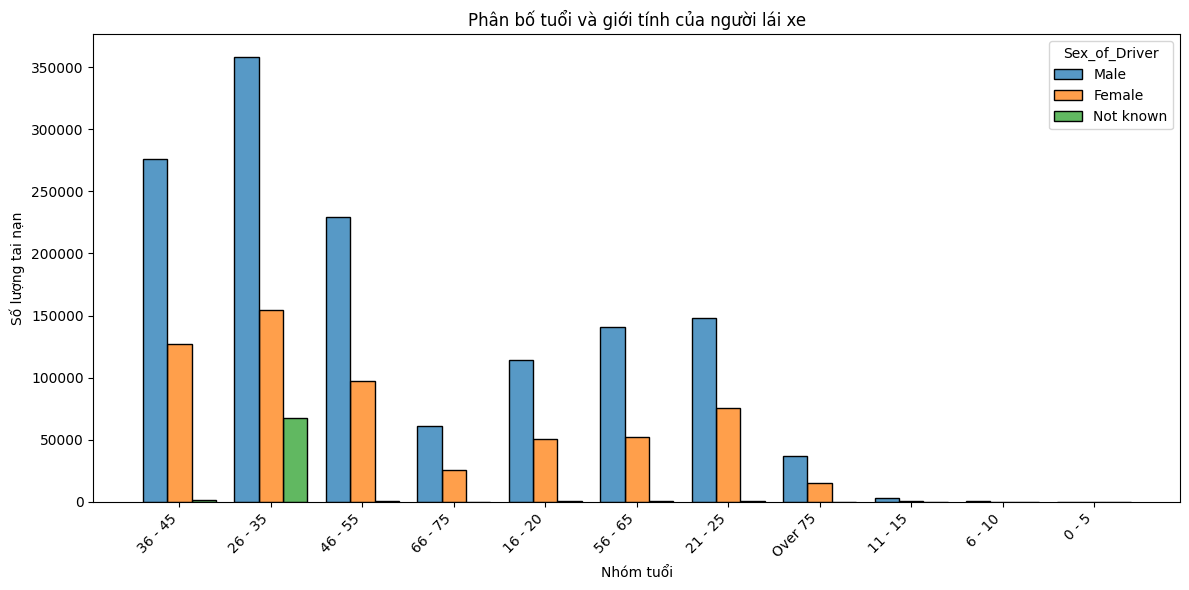

In [65]:
# Phân bố tuổi và giới tính của người lái xe
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age_Band_of_Driver', hue='Sex_of_Driver', multiple='dodge', shrink=0.8)
plt.title('Phân bố tuổi và giới tính của người lái xe')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng tai nạn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Nhóm tuổi và giới tính liên quan đến tai nạn nghiêm trọng:

Khi phân tích các vụ tai nạn nghiêm trọng, nam giới trong nhóm tuổi trung niên vẫn chiếm tỷ lệ cao nhất. Điều này cho thấy không chỉ số lượng mà cả mức độ nghiêm trọng cũng tập trung ở nhóm này.



Nhóm tuổi và giới tính liên quan đến tai nạn nghiêm trọng nhất:
Age_Band_of_Driver  Sex_of_Driver
26 - 35             Male             43027
36 - 45             Male             38168
46 - 55             Male             33881
21 - 25             Male             21417
56 - 65             Male             21244
16 - 20             Male             18004
26 - 35             Female           13583
36 - 45             Female           12271
46 - 55             Female           10388
66 - 75             Male              9436
26 - 35             Not known         7572
21 - 25             Female            6923
56 - 65             Female            6342
Over 75             Male              6182
16 - 20             Female            4814
66 - 75             Female            3669
Over 75             Female            2661
11 - 15             Male               589
36 - 45             Not known          176
46 - 55             Not known           99
6 - 10              Male                9

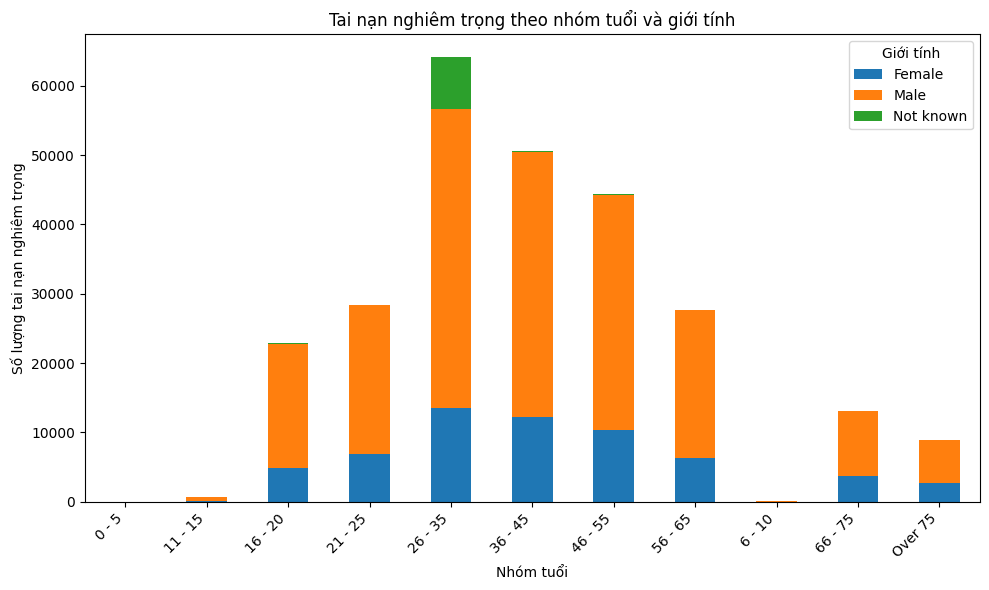

In [66]:
# Nhóm tuổi và giới tính nào liên quan đến tai nạn nghiêm trọng nhất?
severe_accidents = df[df['Accident_Severity'] == 'Serious']
severe_age_gender = severe_accidents.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().sort_values(ascending=False)
print("\nNhóm tuổi và giới tính liên quan đến tai nạn nghiêm trọng nhất:")
print(severe_age_gender)
severe_age_gender.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tai nạn nghiêm trọng theo nhóm tuổi và giới tính')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng tai nạn nghiêm trọng')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()

In [ ]:
age_gender_weather = df.groupby(['Age_Band_of_Driver', 'Sex_of_Driver', 'Weather_Conditions']).size().sort_values(ascending=False).head(10)
print("\nTop 10 sự kết hợp giữa tuổi, giới tính và điều kiện thời tiết trong các vụ tai nạn:")
print(age_gender_weather)


Top 10 sự kết hợp giữa tuổi, giới tính và điều kiện thời tiết trong các vụ tai nạn:
Age_Band_of_Driver  Sex_of_Driver  Weather_Conditions
26 - 35             Male           Fine no high winds    290147
36 - 45             Male           Fine no high winds    223554
46 - 55             Male           Fine no high winds    187589
26 - 35             Female         Fine no high winds    123334
21 - 25             Male           Fine no high winds    118325
56 - 65             Male           Fine no high winds    114948
36 - 45             Female         Fine no high winds    101734
16 - 20             Male           Fine no high winds     89653
46 - 55             Female         Fine no high winds     78036
21 - 25             Female         Fine no high winds     58962
dtype: int64


Yếu tố kết hợp:

Khi kết hợp thêm điều kiện thời tiết, các nhóm nam giới trung niên lái xe trong điều kiện thời tiết tốt vẫn chiếm đa số. Tuy nhiên, khi thời tiết xấu, nguy cơ tai nạn nghiêm trọng tăng lên.


### 2. Loại phương tiện phổ biến trong các vụ tai nạn



Loại phương tiện phổ biến trong các vụ tai nạn:
Vehicle_Type
Car                                      1511985
Van / Goods 3.5 tonnes mgw or under       110185
Motorcycle over 500cc                      71266
Bus or coach (17 or more pass seats)       68240
Motorcycle 125cc and under                 59075
Goods 7.5 tonnes mgw and over              48387
Taxi/Private hire car                      43569
Pedal cycle                                38820
Motorcycle over 125cc and up to 500cc      20938
Motorcycle 50cc and under                  20754
Goods over 3.5t. and under 7.5t            17196
Other vehicle                              12620
Agricultural vehicle                        5475
Minibus (8 - 16 passenger seats)            5328
Goods vehicle - unknown weight              1856
Motorcycle - unknown cc                      740
Mobility scooter                             502
Ridden horse                                 223
Electric motorcycle                           78
Tram   

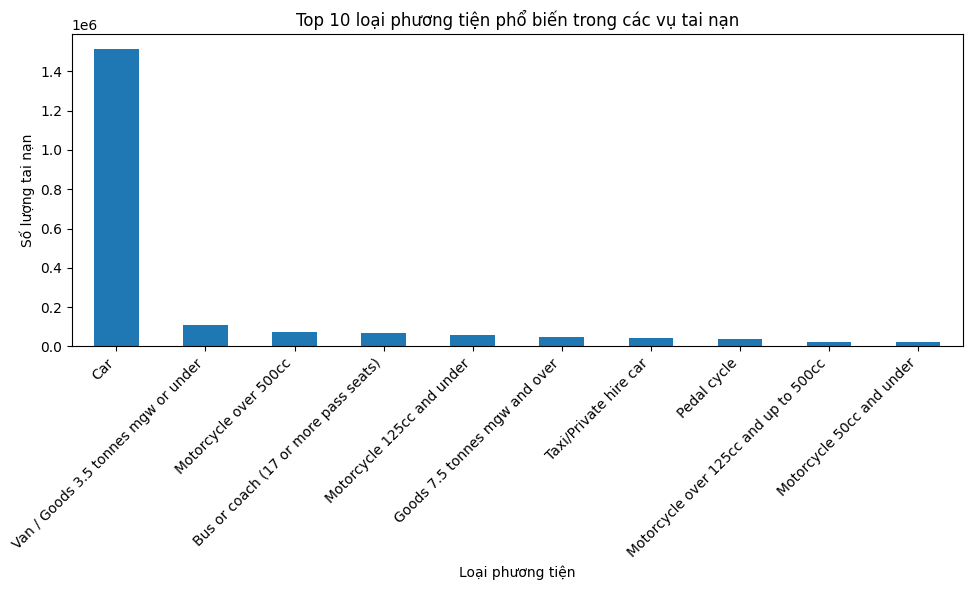

In [ ]:
# Loại phương tiện phổ biến trong các vụ tai nạn
vehicle_counts = df['Vehicle_Type'].value_counts().sort_values(ascending=False)
print("\nLoại phương tiện phổ biến trong các vụ tai nạn:")
print(vehicle_counts)
vehicle_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 loại phương tiện phổ biến trong các vụ tai nạn')
plt.xlabel('Loại phương tiện')
plt.ylabel('Số lượng tai nạn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Phương tiện gây tai nạn nhiều nhất:

Xe ô tô con ("Car") chiếm số lượng lớn nhất, tiếp theo là xe tải nhỏ, xe máy, xe buýt, v.v. Điều này phù hợp với thực tế khi ô tô con là phương tiện phổ biến nhất.



Loại phương tiện liên quan đến tai nạn nghiêm trọng nhất:
Vehicle_Type
Car                                      167259
Motorcycle over 500cc                     23861
Van / Goods 3.5 tonnes mgw or under       13494
Motorcycle 125cc and under                12531
Goods 7.5 tonnes mgw and over              7818
Bus or coach (17 or more pass seats)       7816
Pedal cycle                                7115
Motorcycle over 125cc and up to 500cc      5675
Taxi/Private hire car                      5182
Motorcycle 50cc and under                  3599
Goods over 3.5t. and under 7.5t            2306
Other vehicle                              1693
Agricultural vehicle                       1158
Minibus (8 - 16 passenger seats)            715
Goods vehicle - unknown weight              234
Motorcycle - unknown cc                     218
Mobility scooter                            111
Ridden horse                                 48
Electric motorcycle                          21
Tram            

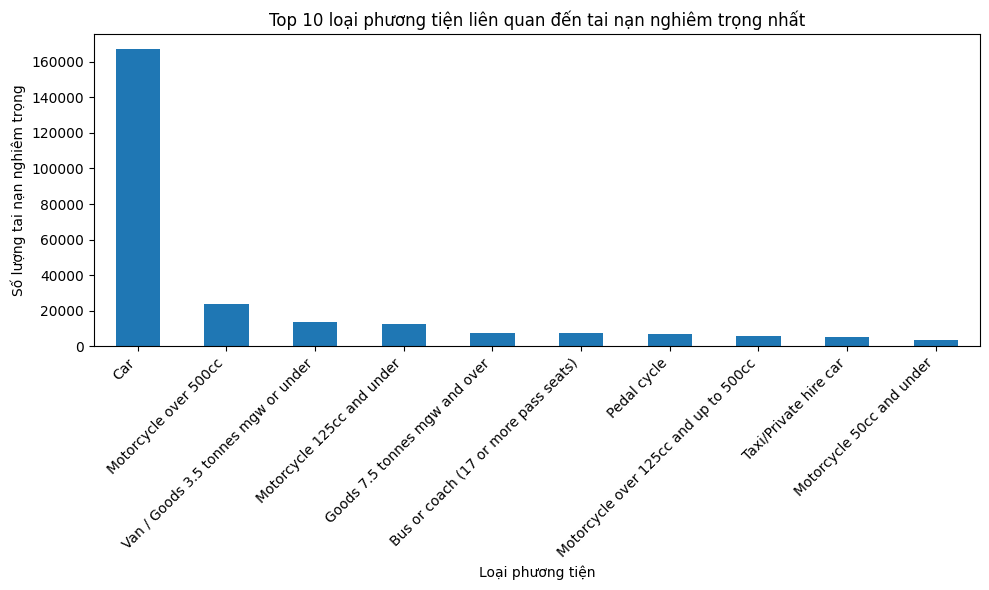

In [ ]:
# Loại phương tiện nào liên quan đến tai nạn nghiêm trọng nhất?
severe_vehicle = severe_accidents['Vehicle_Type'].value_counts().sort_values(ascending=False)
print("\nLoại phương tiện liên quan đến tai nạn nghiêm trọng nhất:")
print(severe_vehicle)
severe_vehicle.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 loại phương tiện liên quan đến tai nạn nghiêm trọng nhất')
plt.xlabel('Loại phương tiện')
plt.ylabel('Số lượng tai nạn nghiêm trọng')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Phương tiện liên quan đến tai nạn nghiêm trọng:

Xe ô tô con vẫn đứng đầu, nhưng các loại xe lớn như xe tải, xe buýt cũng có số vụ nghiêm trọng đáng kể.


### 3. Các thao tác lái xe dẫn đến tai nạn



Thao tác lái xe dẫn đến nhiều tai nạn nhất:
Vehicle_Manoeuvre
Going ahead other                      925935
Turning right                          204538
Slowing or stopping                    167858
Waiting to go - held up                143570
Moving off                              85365
Going ahead right-hand bend             84684
Parked                                  81064
Going ahead left-hand bend              73258
Turning left                            66680
Overtaking moving vehicle - offside     40655
Waiting to turn right                   34359
Reversing                               29027
Overtaking static vehicle - offside     24711
Changing lane to left                   17997
Changing lane to right                  17701
U-turn                                  16342
Waiting to turn left                    11634
Overtaking - nearside                   10626
Unknown                                  1274
Name: count, dtype: int64


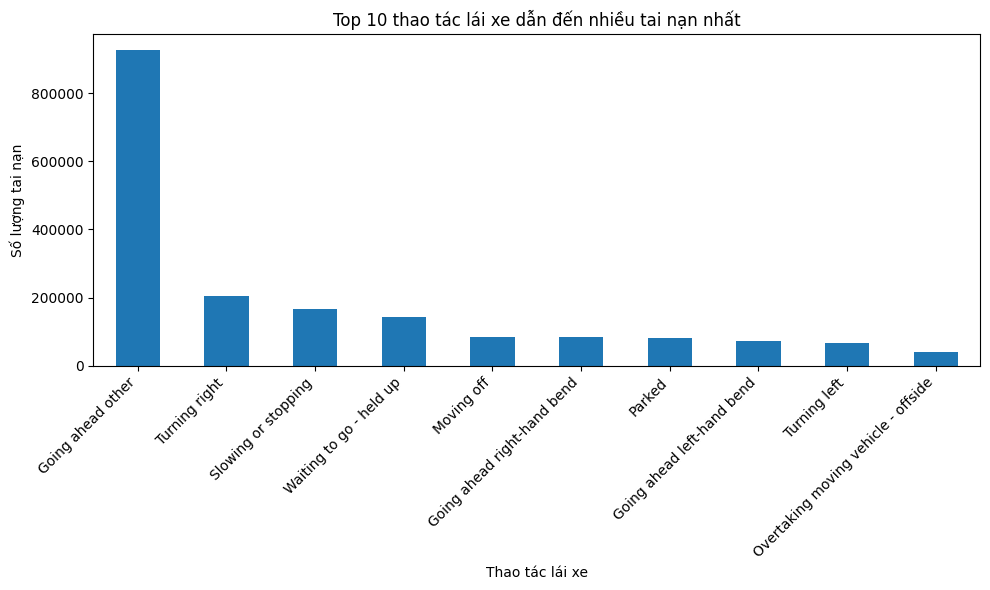

In [ ]:
# Thao tác lái xe nào dẫn đến nhiều tai nạn nhất?
manoeuvre_counts = df['Vehicle_Manoeuvre'].value_counts().sort_values(ascending=False)
print("\nThao tác lái xe dẫn đến nhiều tai nạn nhất:")
print(manoeuvre_counts)
manoeuvre_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 thao tác lái xe dẫn đến nhiều tai nạn nhất')
plt.xlabel('Thao tác lái xe')
plt.ylabel('Số lượng tai nạn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Thao tác nguy hiểm nhất:

"Going ahead other" (đi thẳng) là thao tác dẫn đến nhiều tai nạn nhất, tiếp theo là "Turning right" (rẽ phải), "Slowing or stopping" (giảm tốc hoặc dừng), "Waiting to go - held up" (chờ đi do bị cản trở).

Những thao tác này thường xảy ra ở các nút giao thông, nơi có nhiều phương tiện giao cắt.



Năm dòng đầu của DataFrame sau khi ánh xạ 'Severity_Level':
  Accident_Severity  Accident_Severity_Numeric
0            Slight                          1
1            Slight                          1
2            Slight                          1
3            Slight                          1
4            Slight                          1

Mức độ nghiêm trọng trung bình theo thao tác lái xe (Severity_Level):
Vehicle_Manoeuvre
Going ahead left-hand bend             1.268803
Going ahead right-hand bend            1.254735
Overtaking moving vehicle - offside    1.252441
Overtaking static vehicle - offside    1.178180
Going ahead other                      1.171945
Parked                                 1.168965
U-turn                                 1.164362
Overtaking - nearside                  1.155938
Turning right                          1.153825
Reversing                              1.130775
Changing lane to right                 1.123891
Turning left                           1

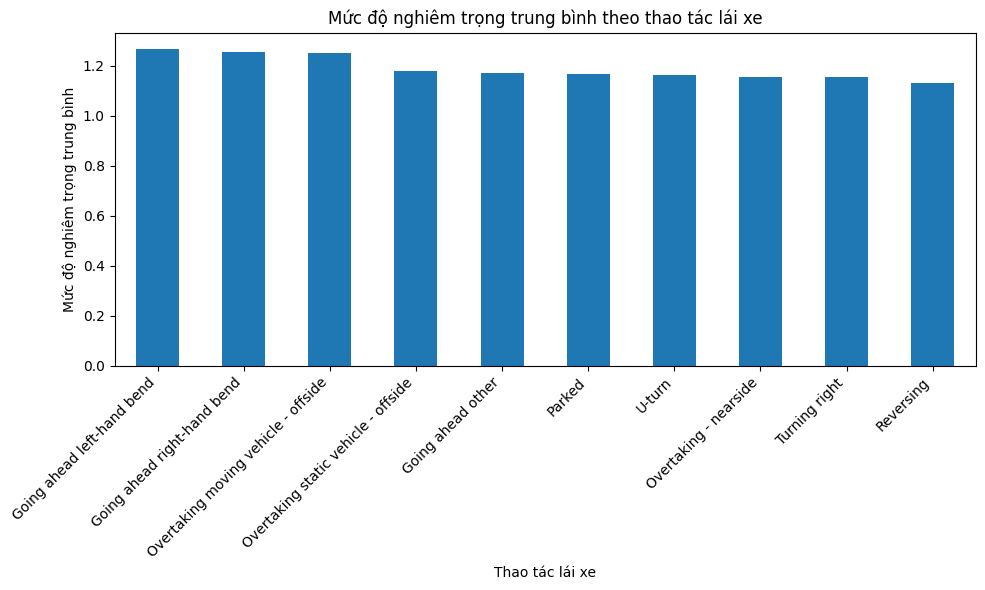

In [ ]:
severity_mapping = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
df['Accident_Severity_Numeric'] = df['Accident_Severity'].map(severity_mapping)

# Kiểm tra xem việc ánh xạ có thành công không
print("\nNăm dòng đầu của DataFrame sau khi ánh xạ 'Severity_Level':")
print(df[['Accident_Severity', 'Accident_Severity_Numeric']].head())


# Mối liên hệ giữa thao tác lái xe và mức độ nghiêm trọng của tai nạn?
manoeuvre_severity = df.groupby('Vehicle_Manoeuvre')['Accident_Severity_Numeric'].mean().sort_values(ascending=False)
print("\nMức độ nghiêm trọng trung bình theo thao tác lái xe (Severity_Level):")
print(manoeuvre_severity)
manoeuvre_severity.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Mức độ nghiêm trọng trung bình theo thao tác lái xe')
plt.xlabel('Thao tác lái xe')
plt.ylabel('Mức độ nghiêm trọng trung bình')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mức độ nghiêm trọng trung bình:

Một số thao tác như "Waiting to go - held up", "Waiting to turn right", "Going ahead left/right-hand bend" có mức độ nghiêm trọng trung bình cao hơn, cho thấy các tình huống này tiềm ẩn rủi ro lớn.


In [ ]:
# Thao tác lái xe nguy hiểm phổ biến theo loại đường là gì?
manoeuvre_road = df.groupby(['Junction_Detail', 'Vehicle_Manoeuvre']).size().sort_values(ascending=False).head(10)
print("\nTop 10 thao tác lái xe nguy hiểm phổ biến theo loại đường:")
print(manoeuvre_road)

# Các thao tác lái xe nguy hiểm có thay đổi theo thời gian trong ngày không?
manoeuvre_time = df.groupby(['Time_Period', 'Vehicle_Manoeuvre']).size().sort_values(ascending=False).head(10)
print("\nTop 10 thao tác lái xe nguy hiểm theo thời gian trong ngày:")
print(manoeuvre_time)


Top 10 thao tác lái xe nguy hiểm phổ biến theo loại đường:
Junction_Detail                      Vehicle_Manoeuvre          
Not at junction or within 20 metres  Going ahead other              388491
T or staggered junction              Going ahead other              257212
                                     Turning right                  121754
Crossroads                           Going ahead other              111956
Roundabout                           Going ahead other               80803
Not at junction or within 20 metres  Slowing or stopping             80706
                                     Going ahead right-hand bend     57339
                                     Waiting to go - held up         54048
                                     Parked                          52161
                                     Going ahead left-hand bend      51199
dtype: int64

Top 10 thao tác lái xe nguy hiểm theo thời gian trong ngày:
Time_Period  Vehicle_Manoeuvre      
Afternoon    G

Các thao tác nguy hiểm phổ biến nhất thường xuất hiện ở các loại nút giao như crossroads (ngã tư), roundabout (bùng binh), v.v.

Các thao tác nguy hiểm có thể thay đổi theo khung giờ (sáng, chiều, tối), phản ánh đặc thù giao thông từng thời điểm.


Nhóm tuổi lao động, đặc biệt là nam giới, là đối tượng có nguy cơ tai nạn giao thông cao nhất, cả về số lượng và mức độ nghiêm trọng. Xe ô tô con là phương tiện phổ biến nhất trong các vụ tai nạn, đồng thời cũng là phương tiện liên quan đến nhiều vụ nghiêm trọng. Các thao tác lái xe tưởng chừng đơn giản như đi thẳng, rẽ phải lại là nguyên nhân chính gây tai nạn, đặc biệt tại các nút giao thông đông đúc. Điều này cho thấy việc nâng cao ý thức, kỹ năng lái xe an toàn cho nhóm tuổi lao động, đặc biệt là nam giới, và tăng cường kiểm soát tại các nút giao thông là rất cần thiết để giảm thiểu tai nạn.


# 4.Huấn luyện mô hình


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
data['Latitude'].unique()

array([51.520075, 51.525301, 51.482442, ..., 55.048803, 54.989597,
       55.310151], shape=(985550,))

## Mô hình dự đoán trong năm tới khu vực nào ở các quý trong năm có số lượng vụ tai nạn cao

#### Mô hình này sẽ dự đoán số lượng vụ tai nạn tại những vùng trong đó lấy ra những vùng có số lượng vụ tai nạn cao trong các Quý để xem vùng nào nên có những biện pháp khắc phục kịp thời, vì không có cột nguyên nhân chính nên một vài biện pháp như là: thông báo người dân về thời tiết, tăng cường giám sát, kiểm tra thiết bị điều khiển giao thông, kiểm tra cơ sở hạ tầng,...


In [ ]:

data['quarter'] = data['Date'].dt.quarter

# Làm tròn tọa độ
data['Latitude'] = (data['Latitude'] * 10).round(0) / 10
data['Longitude'] = (data['Longitude'] * 10).round(0) / 10

# Tách dữ liệu theo năm
last_year = data['Year'].max()

# dữ liệu huấn luyện
train_data = data[data['Year'] < last_year]
train_data = train_data.groupby(
    ['quarter', 'Year', 'Latitude', 'Longitude']
).size().reset_index(name='num_accidents')
x_train = train_data[['quarter', 'Year', 'Latitude', 'Longitude', ]]
y_train = train_data['num_accidents']

# dữ liệu kiểm tra = năm last year
test_data = data[data['Year'] == last_year]
test_data = test_data.groupby(
    ['quarter', 'Year', 'Latitude', 'Longitude']
).size().reset_index(name='num_accidents')
x_test = test_data[['quarter', 'Year', 'Latitude', 'Longitude']]

# Thêm cột location để tiện trực quan
test_data['location'] = test_data['Latitude'].astype(str) + ', ' + test_data['Longitude'].astype(str)
train_data['location'] = train_data['Latitude'].astype(str) + ', ' + train_data['Longitude'].astype(str)


In [ ]:
train_data

quarter  Year  Latitude  Longitude  num_accidents    location
0            1  2005      49.9       -6.3              2  49.9, -6.3
1            1  2005      50.1       -5.6              6  50.1, -5.6
2            1  2005      50.1       -5.5             16  50.1, -5.5
3            1  2005      50.1       -5.4              5  50.1, -5.4
4            1  2005      50.1       -5.3              3  50.1, -5.3
...        ...   ...       ...        ...            ...         ...
95794        4  2015      59.0       -3.2              2  59.0, -3.2
95795        4  2015      59.0       -3.1              1  59.0, -3.1
95796        4  2015      59.1       -3.1              1  59.1, -3.1
95797        4  2015      60.1       -1.2              4  60.1, -1.2
95798        4  2015      60.2       -1.2              2  60.2, -1.2

[95799 rows x 6 columns]

In [77]:


mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(32, 32, 32), max_iter=1000, random_state=42)
)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)


In [78]:
test_data['pred'] = y_pred_mlp.astype(int)

In [79]:
test_data

quarter  Year  Latitude  Longitude  num_accidents    location  pred
0           1  2016      49.9       -6.3              1  49.9, -6.3     2
1           1  2016      50.0       -5.3              2  50.0, -5.3    17
2           1  2016      50.0       -5.2              3  50.0, -5.2    17
3           1  2016      50.1       -5.7              2  50.1, -5.7     9
4           1  2016      50.1       -5.6              7  50.1, -5.6    11
...       ...   ...       ...        ...            ...         ...   ...
8999        4  2016      60.1       -1.3              2  60.1, -1.3     3
9000        4  2016      60.1       -1.2              3  60.1, -1.2     5
9001        4  2016      60.2       -1.3              1  60.2, -1.3     3
9002        4  2016      60.4       -1.3              1  60.4, -1.3     3
9003        4  2016      60.5       -1.5              1  60.5, -1.5     0

[9004 rows x 7 columns]

In [80]:


# Tạo danh sách các biểu đồ
figs = []

# Duyệt qua từng quý
for quarter in [1, 2, 3, 4]:
    quarter_data = test_data[test_data['quarter'] == quarter].copy()

    # thực tế
    top10_actual = quarter_data.sort_values(by='num_accidents', ascending=False).head(10)
    fig_actual = px.bar(
        top10_actual,
        x='num_accidents',
        y='location',
        orientation='h',
        title=f'Quý {quarter} - Số vụ tai nạn THỰC TẾ',
        labels={'num_accidents': 'Số vụ tai nạn', 'location': 'Vị trí'},
        color='num_accidents',
        color_continuous_scale='Blues'
    )
    figs.append(fig_actual)

    #dự đoán
    top10_pred = quarter_data.sort_values(by='pred', ascending=False).head(10)
    fig_pred = px.bar(
        top10_pred,
        x='pred',
        y='location',
        orientation='h',
        title=f'Quý {quarter} - Số vụ tai nạn DỰ ĐOÁN',
        labels={'pred': 'Số vụ tai nạn dự đoán', 'location': 'Vị trí'},
        color='pred',
        color_continuous_scale='Oranges'
    )
    figs.append(fig_pred)

# Hiển thị từng biểu đồ
for fig in figs:
    fig.update_layout(yaxis=dict(autorange="reversed"))  # Đảo trục y để hiển thị theo thứ tự giảm dần
    fig.show()


### Đánh giá mô hình


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Thực tế và dự đoán
y_true = test_data['num_accidents']
y_pred = test_data['pred']

# MAE - Sai số tuyệt đối trung bình
mae = mean_absolute_error(y_true, y_pred)

# RMSE - Căn bậc hai của sai số bình phương trung bình
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# R² - Hệ số xác định
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.2f}")


MAE: 18.13
RMSE: 33.39
R² score: 0.81


#### MAE (Mean Absolute Error) = 18.13

Đây là sai số tuyệt đối trung bình giữa giá trị dự đoán và giá trị thực tế.

Ý nghĩa: Mỗi điểm dữ liệu trong tập kiểm tra, trung bình mô hình dự đoán lệch khoảng 18 vụ tai nạn so với thực tế.

#### RMSE (Root Mean Squared Error) = 33.39

Đây là căn bậc hai của sai số bình phương trung bình.

Ý nghĩa: Trung bình mỗi dự đoán cách giá trị thực tế khoảng 33 vụ tai nạn (tính theo sai số bình phương).

Cũng giống như MAE, thấp hơn thì càng tốt.

#### R² score (Hệ số xác định) = 0.81

Đây là chỉ số đo lường mức độ mô hình giải thích được phương sai của dữ liệu.

Giá trị dao động từ 0 đến 1:

1.0 → mô hình hoàn hảo.

0.0 → mô hình không giải thích được gì (dự đoán kém như trung bình cộng).

Ý nghĩa: Mô hình của bạn giải thích được 81% sự biến động trong dữ liệu thực tế — khá tốt.

#### Kết luận: Mô hình của bạn hoạt động khá tốt có độ chính xác khá cao (R² = 0.81) và sai số trung bình ở mức có thể chấp nhận được.


## Dự đoán mức độ nghiêm trọng của tai nạn với mô hình Random Forest

Các đặc trưng sử dụng gồm:

- Thời gian (`Time_Period`, `Day_of_Week`)
- Địa điểm (`Urban_or_Rural_Area`, `Junction_Detail`)
- Điều kiện môi trường (`Weather_Conditions`, `Light_Conditions`)
- Thông tin phương tiện và hành vi tài xế

Kết quả mô hình sẽ giúp:

- Hỗ trợ đánh giá rủi ro tai nạn nghiêm trọng trong từng điều kiện cụ thể
- Là cơ sở để xây dựng hệ thống cảnh báo thông minh hoặc hỗ trợ quyết định chính sách giao thông


### 1. Đọc dữ liệu và xử lý nhãn

- Đọc file `cleaned_data.csv`
- Tạo cột `Target`: 1 nếu tai nạn `Minor`, 0 nếu `Serious/Fatal`


In [82]:

# Tạo cột nhãn
df['Target'] = df['Accident_Severity'].apply(lambda x: 1 if x == 'Slight' else 0)

# Xem một vài dòng đầu
df.head()

Date      Time Day_of_Week Accident_Severity  Number_of_Casualties  \
0  2005-01-05  17:36:00   Wednesday            Slight                     1   
1  2005-01-06  00:15:00    Thursday            Slight                     1   
2  2005-01-07  10:35:00      Friday            Slight                     1   
3  2005-01-10  21:13:00      Monday            Slight                     1   
4  2005-01-11  12:40:00     Tuesday            Slight                     1   

   Number_of_Vehicles     Weather_Conditions Road_Surface_Conditions  \
0                   1     Fine no high winds                     Dry   
1                   2     Fine no high winds                     Dry   
2                   1     Fine no high winds                     Dry   
3                   1     Fine no high winds             Wet or damp   
4                   2  Raining no high winds             Wet or damp   

              Light_Conditions  Speed_limit  ... Age_Band_of_Driver  \
0        Darkness - lights lit         30.0  ...            36 - 45   
1        Darkness - lights lit         30.0  ...            26 - 35   
2                     Daylight         30.0  ...            46 - 55   
3  Darkness - lighting unknown         30.0  ...            46 - 55   
4                     Daylight         30.0  ...            46 - 55   

   Sex_of_Driver            Vehicle_Manoeuvre Vehicle_Leaving_Carriageway  \
0           Male          Slowing or stopping   Did not leave carriageway   
1           Male  Going ahead right-hand bend   Did not leave carriageway   
2         Female            Going ahead other   Did not leave carriageway   
3           Male            Going ahead other   Did not leave carriageway   
4           Male                   Moving off   Did not leave carriageway   

  Time_Period  Is_Weekend  Season  Hour Accident_Severity_Numeric Target  
0   Afternoon     Weekday  Winter    17                         1      1  
1       Night     Weekday  Winter     0                         1      1  
2     Morning     Weekday  Winter    10                         1      1  
3     Evening     Weekday  Winter    21                         1      1  
4   Afternoon     Weekday  Winter    12                         1      1  

[5 rows x 29 columns]

### 2. Lấy mẫu có trọng số theo nhãn

- Do tỷ lệ `Slight` chiếm đa số, ta **lấy mẫu 30% có trọng số** để cân bằng giữa các lớp trong quá trình huấn luyện
- Trọng số: `Slight = 0.2`, `Serious/Fatal = 0.8`


In [83]:
weights = np.where(df['Target'] == 1, 0.2, 0.8)

# Lấy mẫu 30% từ dữ liệu gốc theo trọng số
df_sampled = df.sample(frac=0.3, replace=True, weights=weights, random_state=42)

print("Kích thước sau khi sample:", df_sampled.shape)
print("Phân bố nhãn:")
print(df_sampled['Target'].value_counts(normalize=True))


Kích thước sau khi sample: (611183, 29)
Phân bố nhãn:
Target
1    0.604357
0    0.395643
Name: proportion, dtype: float64


### 3. Trực quan hóa phân phối nhãn và đặc trưng

- Vẽ biểu đồ phân phối nhãn gốc và sau khi lấy mẫu
- Trực quan hóa mối quan hệ giữa nhãn và các đặc trưng như:
  - Nhóm tuổi tài xế
  - Tốc độ giới hạn
  - Đô thị vs. nông thôn
  - Thao tác điều khiển xe


C:\Users\ACER\AppData\Local\Temp\ipykernel_5456\770477134.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




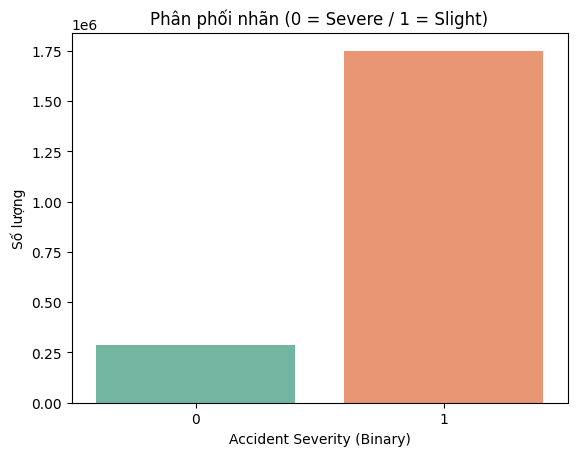

In [84]:
sns.countplot(x='Target', data=df, palette='Set2')
plt.title("Phân phối nhãn (0 = Severe / 1 = Slight)")
plt.xlabel("Accident Severity (Binary)")
plt.ylabel("Số lượng")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5456\3362785665.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




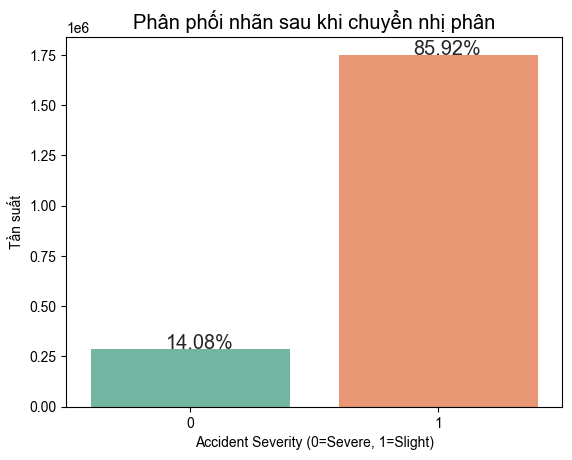

In [85]:
# Phân phối nhãn mới
ax = sns.countplot(x='Target', data=df, palette="Set2")
sns.set(font_scale=1.2)
ax.set_xlabel('Accident Severity (0=Severe, 1=Slight)')
ax.set_ylabel('Tần suất')

# Hiển thị phần trăm trên cột
total = len(df)
for p in ax.patches:
    ax.annotate(f'{100*p.get_height()/total:.2f}%', 
                (p.get_x()+0.3, p.get_height()+1000))
    
plt.title('Phân phối nhãn sau khi chuyển nhị phân')
plt.show()

<Axes: title={'center': 'Tỷ lệ Slight theo thao tác xe'}, xlabel='Vehicle_Manoeuvre'>

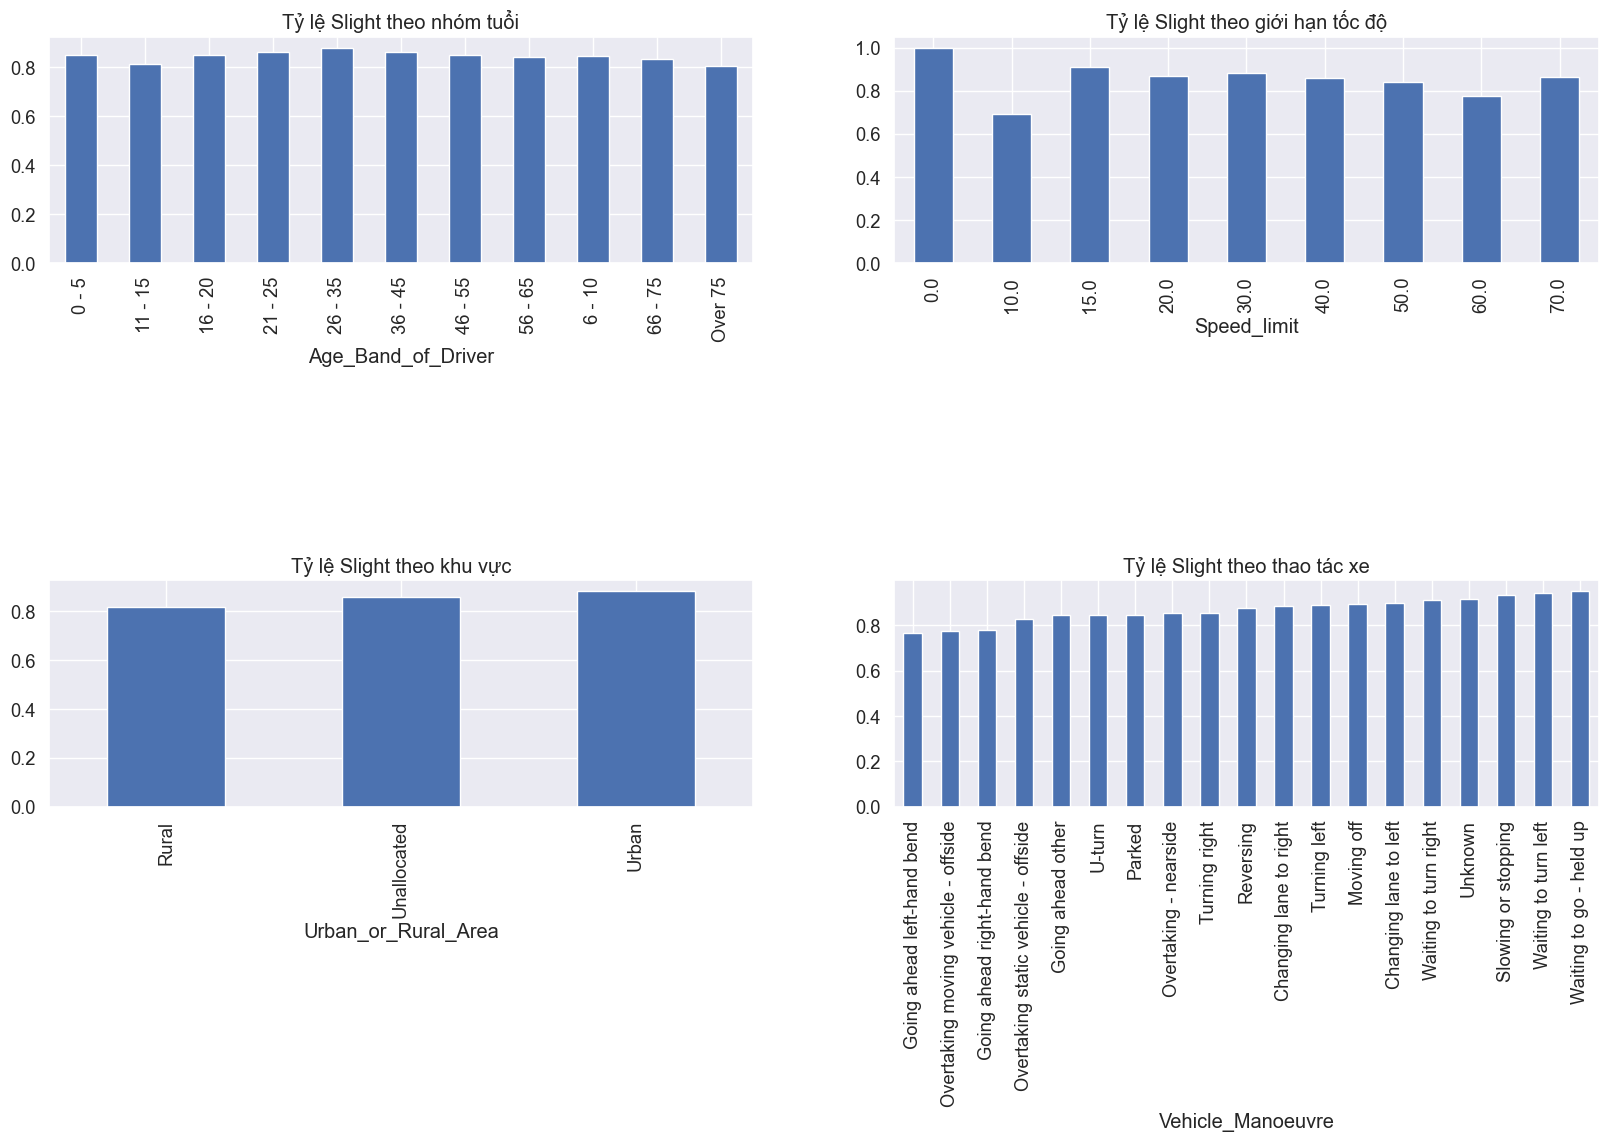

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
plt.subplots_adjust(hspace=1.4)

# Độ tuổi tài xế
(df.groupby('Age_Band_of_Driver')['Target']
 .mean().sort_index()
 .plot(kind='bar', ax=axes[0,0], title='Tỷ lệ Slight theo nhóm tuổi'))

# Tốc độ giới hạn
(df.groupby('Speed_limit')['Target']
 .mean().sort_index()
 .plot(kind='bar', ax=axes[0,1], title='Tỷ lệ Slight theo giới hạn tốc độ'))

# Đô thị / nông thôn
(df.groupby('Urban_or_Rural_Area')['Target']
 .mean().sort_index()
 .plot(kind='bar', ax=axes[1,0], title='Tỷ lệ Slight theo khu vực'))

# Loại thao tác phương tiện
(df.groupby('Vehicle_Manoeuvre')['Target']
 .mean().sort_values()
 .plot(kind='bar', ax=axes[1,1], title='Tỷ lệ Slight theo thao tác xe'))

### 4. Lựa chọn đặc trưng đầu vào

Chọn các cột **không gây rò rỉ dữ liệu**, bao gồm:

- Thời gian: `Time_Period`, `Day_of_Week`
- Môi trường: `Light_Conditions`, `Weather_Conditions`, `Road_Surface_Conditions`
- Đặc trưng hành vi/xe: `Vehicle_Manoeuvre`, `Vehicle_Type`, `Sex_of_Driver`
- Các yếu tố khác: `Speed_limit`, `Urban_or_Rural_Area`, `Junction_Detail`, …


In [87]:
df2 = df_sampled[[
    'Day_of_Week', 'Junction_Detail', 'Light_Conditions',
    'Number_of_Vehicles', 'Road_Surface_Conditions', 'Special_Conditions_at_Site',
    'Speed_limit', 'Time_Period', 'Urban_or_Rural_Area', 'Weather_Conditions',
    'Age_Band_of_Driver', 'Vehicle_Manoeuvre', 'Sex_of_Driver', 'Vehicle_Type',
    'Target'
]].copy()

In [88]:
X = df2.drop(columns=['Target'])
y = df2['Target']
print("X shape:", X.shape, "| y shape:", y.shape)

X shape: (611183, 14) | y shape: (611183,)


### 5. Xây dựng pipeline tiền xử lý

Pipeline bao gồm:

- `Speed_limit`: xử lý thiếu và one-hot encode
- `Time_Period`: one-hot encode
- `Number_of_Vehicles`: numeric feature → median impute
- Các biến phân loại: one-hot encode

Tất cả kết hợp bằng `FeatureUnion` → scale bằng `MaxAbsScaler`.


In [89]:
def get_Speed_limit(df):
    return df[['Speed_limit']]

FullTransformerOnSpeedLimit = Pipeline([
    ("Select",      FunctionTransformer(get_Speed_limit, validate=False)),
    ("Impute",      SimpleImputer(strategy='most_frequent')),
    ("OneHot",      OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [90]:
def get_Time_Period(df):
    return df[['Time_Period']]

FullTransformerOnTime = Pipeline([
    ("Select",  FunctionTransformer(get_Time_Period, validate=False)),
    ("Impute",  SimpleImputer(strategy='most_frequent')),
    ("OneHot",  OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [91]:
def get_numeric_features(df):
    return df[['Number_of_Vehicles']]

FullTransformerOnNumeric = Pipeline([
    ("Select",  FunctionTransformer(get_numeric_features, validate=False)),
    ("Impute",  SimpleImputer(strategy='median'))
])

In [92]:
def get_categorical_columns(df):
    return df[[
        'Day_of_Week', 'Junction_Detail', 'Light_Conditions',
        'Road_Surface_Conditions', 'Special_Conditions_at_Site',
        'Urban_or_Rural_Area', 'Weather_Conditions',
        'Age_Band_of_Driver', 'Vehicle_Manoeuvre',
        'Sex_of_Driver', 'Vehicle_Type'
    ]]

DataToOneHotTransformer = Pipeline([
    ("Select",  FunctionTransformer(get_categorical_columns, validate=False)),
    ("OneHot",  OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])


In [93]:
FeatureUnionTransformer = FeatureUnion([
    ("SpeedLimit",   FullTransformerOnSpeedLimit),
    ("TimePeriod",   FullTransformerOnTime),
    ("Numeric",      FullTransformerOnNumeric),
    ("Categoricals", DataToOneHotTransformer)
])

Full_Transformer = Pipeline([
    ("Feature_Engineering", FeatureUnionTransformer),
    ("Scale",               MaxAbsScaler())
])


### 6. Huấn luyện và đánh giá mô hình


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

print("Train size:", X_train.shape, "| Test size:", X_test.shape)


Train size: (458387, 14) | Test size: (152796, 14)


### Random Forest Classifier


In [95]:
# Tiền xử lý đặc trưng
Full_Transformer.fit(X_train)
X_train_transformed = Full_Transformer.transform(X_train)
X_test_transformed = Full_Transformer.transform(X_test)

clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=3, random_state=42)
clf_rf.fit(X_train_transformed, y_train)

y_pred_rf = clf_rf.predict(X_test_transformed)
y_proba_rf = clf_rf.predict_proba(X_test_transformed)[:, 1]

print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba_rf), 4))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.67      0.61      0.64     60453
           1       0.76      0.81      0.78     92343

    accuracy                           0.73    152796
   macro avg       0.72      0.71      0.71    152796
weighted avg       0.73      0.73      0.73    152796

ROC AUC Score: 0.7813


### 7. Phân tích hiệu suất mô hình RANDOM FOREST CLASSIFIER


### 7.1. **In confusion matrix (Ma trận nhầm lẫn)**


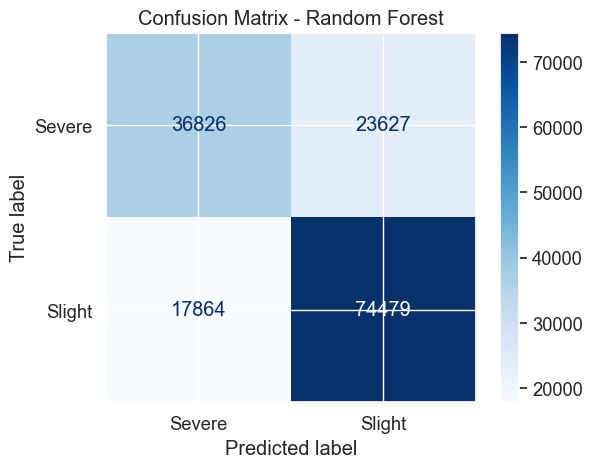

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Severe", "Slight"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

- **True Severe** (dự đoán đúng tai nạn nghiêm trọng): 36,826
- **False Negative** (dự đoán nhầm Slight trong khi thực tế là Severe): 23,627
- **False Positive** (dự đoán nhầm Severe khi thực tế là Slight): 17,864
- **True Minor** (dự đoán đúng tai nạn nhẹ): 74,479


### 7.2. **Vẽ ROC Curve**


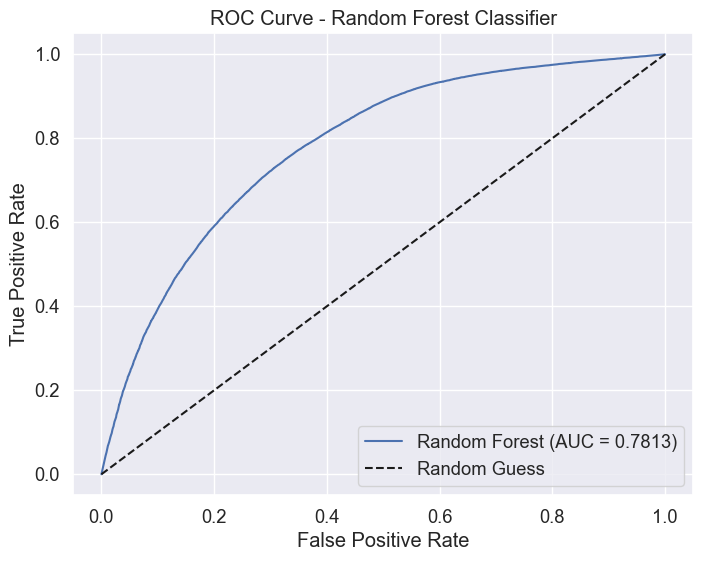

In [97]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.show()

- **AUC = 0.7813**: Mô hình có khả năng phân biệt hai lớp rất tốt.
- Đường ROC nằm cao hơn hẳn so với đường ngẫu nhiên (random guess).


### 7.3. **Feature Importance – Phân tích đặc trưng quan trọng**


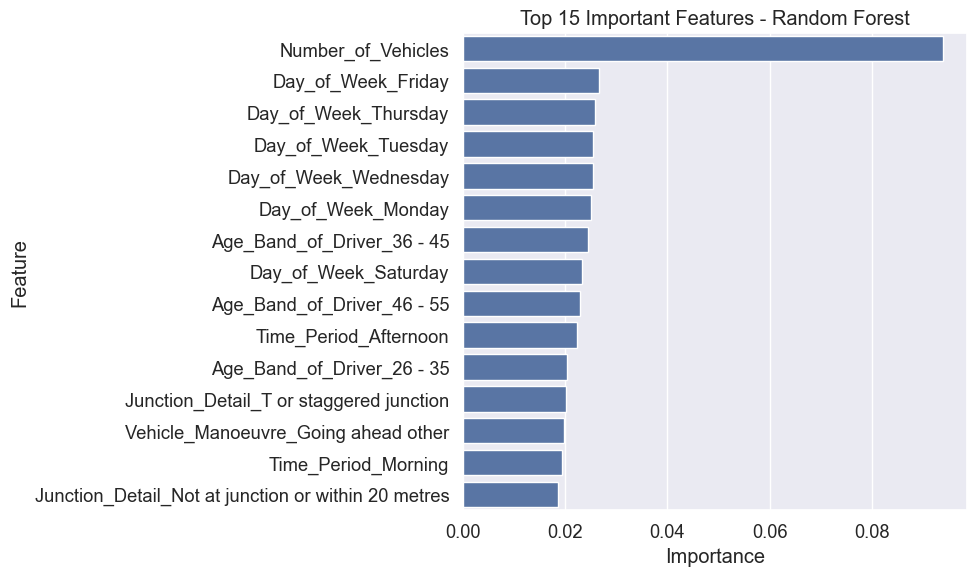

In [98]:
# Số lượng các feature sau mỗi transformer
onehot_speed = FullTransformerOnSpeedLimit.named_steps["OneHot"].get_feature_names_out(["Speed_limit"])
onehot_time = FullTransformerOnTime.named_steps["OneHot"].get_feature_names_out(["Time_Period"])
numeric = ['Number_of_Vehicles']
onehot_cat = DataToOneHotTransformer.named_steps["OneHot"].get_feature_names_out(get_categorical_columns(X).columns)

# Nối tất cả tên đặc trưng
feature_names = np.concatenate([onehot_speed, onehot_time, numeric, onehot_cat])
importances = clf_rf.feature_importances_

importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vẽ Top 15
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importances_df.head(15))
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()


### Nhận xét:

- **Number_of_Vehicles** là đặc trưng quan trọng nhất, vượt trội hơn hẳn. Điều này cho thấy số lượng phương tiện liên quan đến tai nạn là yếu tố then chốt để xác định mức độ nghiêm trọng.
- **Age_Band_of_Driver** cũng đóng vai trò đáng kể:
  - Các nhóm tuổi **36–45**, **26–35**, **46–55** có ảnh hưởng lớn, gợi ý rằng độ tuổi tài xế có liên quan đến hành vi lái xe an toàn.
- **Vehicle_Manoeuvre_Going ahead other** là thao tác lái xe phổ biến trong các tai nạn nhẹ – có thể do lái xe không chủ động phòng tránh hoặc không quan sát kỹ.
- Các ngày trong tuần như **Friday, Thursday, Monday,...** cũng xuất hiện nhiều trong top đặc trưng, có thể liên quan đến lưu lượng giao thông hoặc thói quen đi lại theo ngày.
- **Sex_of_Driver** và **Junction_Detail** cho thấy mô hình đang khai thác cả yếu tố giới tính và vị trí giao lộ để dự đoán mức độ nghiêm trọng.

### Ý nghĩa thực tiễn:

Mô hình không chỉ dừng lại ở việc dự đoán mức độ nghiêm trọng, mà còn mở ra nhiều **ứng dụng thực tiễn** quan trọng:

- **Xây dựng hệ thống cảnh báo sớm**: Các yếu tố như giới hạn tốc độ, khu vực xảy ra tai nạn và hành vi lái xe có thể được tích hợp vào hệ thống hỗ trợ lái xe an toàn.
- **Đánh giá rủi ro bảo hiểm**: Dựa vào thông tin người lái và môi trường giao thông, các công ty bảo hiểm có thể xác định mức độ rủi ro khi định phí.
- **Quản lý quy hoạch giao thông**: Phân tích dữ liệu giúp xác định khu vực hoặc điều kiện giao thông có rủi ro cao, từ đó đề xuất cải tiến cơ sở hạ tầng hoặc thay đổi chính sách.


# 5.Tổng kết và kết luận


### Phát Hiện Chính

Thời gian và thời tiết ảnh hưởng rõ rệt đến tai nạn:

Tai nạn xảy ra nhiều hơn vào các giờ cao điểm (sáng 8-9h và chiều 16-18h).

Thời tiết xấu (mưa, sương mù) và điều kiện ánh sáng yếu (tối không đèn đường) có xu hướng làm tăng số vụ tai nạn nghiêm trọng.

Tuổi tài xế và loại phương tiện có liên quan đến mức độ tai nạn:

Tài xế trẻ (dưới 25 tuổi) có tỷ lệ gây tai nạn cao hơn, đặc biệt với các phương tiện nhỏ và xe thể thao.

Một số khu vực và tuyến đường có nguy cơ cao:

Các tuyến đường lớn (A roads) và khu vực đô thị đông đúc (như London) có tần suất tai nạn cao, đặc biệt trong giờ cao điểm.


### Kết luận chung

Một trong những kết luận rõ rệt nhất từ phân tích là yếu tố con người vẫn là nguyên nhân hàng đầu dẫn đến tai nạn, thể hiện qua sự liên hệ giữa độ tuổi tài xế, hành vi khi điều khiển phương tiện, và hậu quả tai nạn. Các nhóm tài xế trẻ tuổi (dưới 25) thường liên quan đến các tai nạn nghiêm trọng, trong khi người điều khiển xe máy và xe đạp là nhóm dễ bị tổn thương nhất, đặc biệt trong điều kiện ánh sáng yếu hoặc thời tiết xấu.

Điều kiện môi trường và thời gian cũng đóng vai trò then chốt: tai nạn tăng mạnh vào các khung giờ cao điểm, thường rơi vào đầu giờ sáng và cuối buổi chiều. Thời tiết mưa, sương mù, và đường ướt làm tăng xác suất tai nạn nặng. Những dữ kiện này gợi mở nhu cầu cải thiện hạ tầng như hệ thống chiếu sáng công cộng, biển báo hiệu rõ ràng hơn trong điều kiện thời tiết khắc nghiệt, và tăng cường kiểm soát giao thông vào các khung giờ nguy hiểm.

Bên cạnh đó, địa lý và cơ sở hạ tầng giao thông cũng cho thấy mối liên hệ đáng kể với mật độ và mức độ nghiêm trọng của tai nạn. Những tuyến đường chính (A roads) và khu vực đô thị đông dân cư như London, Birmingham có số lượng tai nạn cao vượt trội so với khu vực nông thôn. Điều này phản ánh tầm quan trọng của việc quy hoạch và điều tiết giao thông phù hợp với đặc điểm từng vùng, thay vì áp dụng các chính sách an toàn đồng nhất trên toàn quốc.

Ngoài ra, thông tin chi tiết về từng nạn nhân bao gồm tuổi, giới tính, vị trí trong tai nạn, mức độ thương tích là tài nguyên quý báu cho các nhà hoạch định chính sách xã hội. Việc hiểu rõ ai là đối tượng dễ tổn thương nhất giúp chính phủ đưa ra các chiến dịch giáo dục giao thông hoặc thiết kế công trình hạ tầng phù hợp hơn (như đường đi bộ, làn đường xe đạp riêng biệt,...).
